The dataset is available:
https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download
or
https://github.com/romthevacuousspider/ML2-dataset

The fuel consumption dataset is available on [Kaggle](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download), the provider described: "Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
To help you compare vehicles from different model years, the fuel consumption ratings for 2000 to 2022 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing."

The dataset was additionally added to my [github](https://github.com/romthevacuousspider/ML2-dataset) to avoid any possible further changes.


The Original data is extracted from [Open Canada Data](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

A description of the columns is provided below:

### Model

- 4WD/4X4: Four-wheel drive
- AWD: All-wheel drive
- CNG: Compressed natural gas
- FFV: Flexible-fuel vehicle
- NGV: Natural gas vehicle
- #: High output engine that provides more power than the standard engine of the same size

### Transmission

- A: Automatic
- AM: Automated manual
- AS: Automatic with select shift
- AV: Continuously variable
- M: Manual
- 3 - 10: Number of gears

### Fuel Type

- X: Regular gasoline
- Z: Premium gasoline
- D: Diesel
- E: Ethanol (E85)
- N: Natural Gas

### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

Based on this [article](https://www.ageco.co.uk/useful-articles/car/what-are-the-co2-emissions-of-my-car/) we can classify the cars by their emission:

- 150g/km emission is considered low
- 160 to 255g/km emission is considered medium
- Above 255g/km emission is considered high

In [1]:
# Import essentials (libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
import tensorflow as tf
from tensorflow import keras
import random
import keras_tuner as kt
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from keras import backend as K

In [2]:
# regression

In [3]:
import pandas as pd
import numpy as np

# open the dataset
Dataset_initial = pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [4]:
# Overview
Dataset_initial.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
# info
Dataset_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
# Check count, mean, std, min, max, etc. for each column
Dataset_initial.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [7]:
# Check for NaN and null values in our dataset
nan_count = Dataset_initial.isna().sum()  # Counts NaN values
null_count = Dataset_initial.isnull().sum()  # Counts null values

print("Number of NaN values:", nan_count)
print("Number of null values:", null_count)

Number of NaN values: YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64
Number of null values: YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [8]:
import numpy as np

# Calculate the number of data points in the dataset
num_data_points = len(Dataset_initial)

# Calculate the number of bins using the Square Root Rule
num_bins = int(np.sqrt(num_data_points))

print("Number of Data Points:", num_data_points)
print("Number of Bins (Square Root Rule):", num_bins)


Number of Data Points: 22556
Number of Bins (Square Root Rule): 150


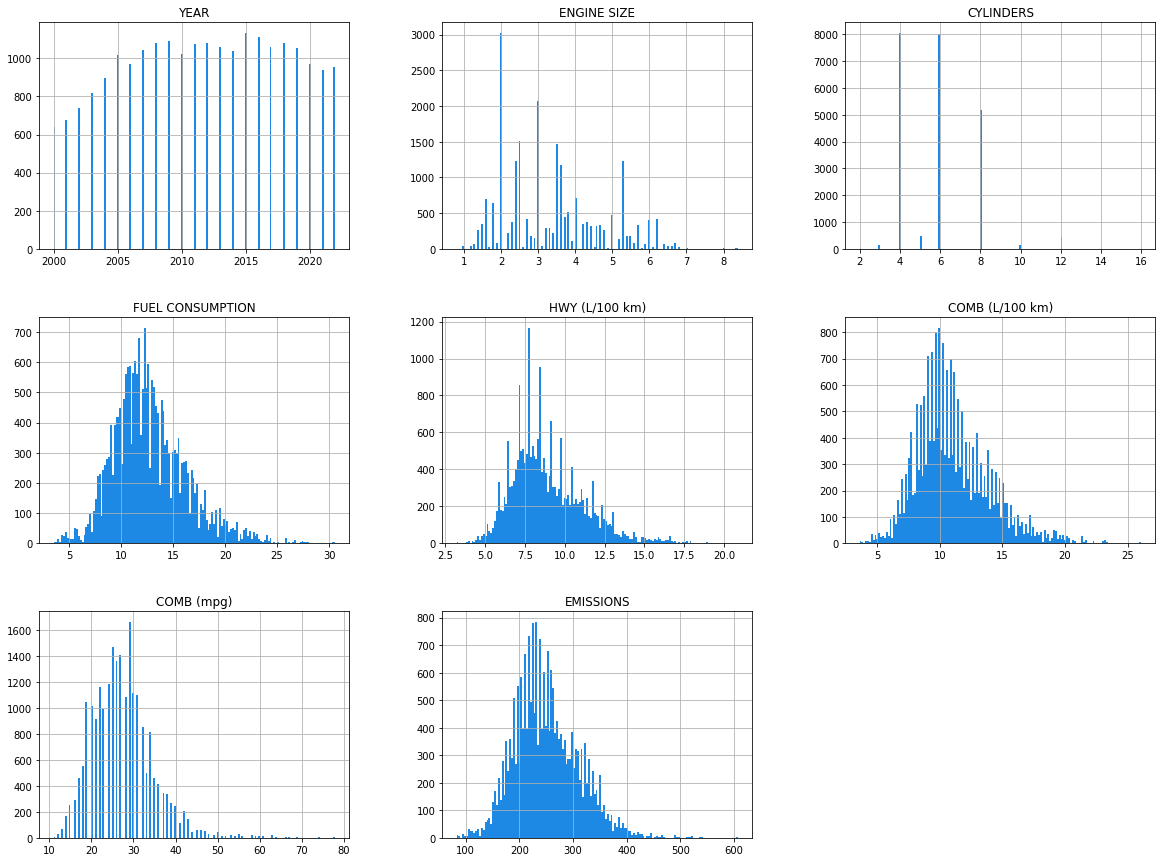

In [9]:
# Histograms
%matplotlib inline
import matplotlib.pyplot as plt

Dataset_initial.hist(bins=150, figsize=(20,15), color='#1E88E5')
plt.show()

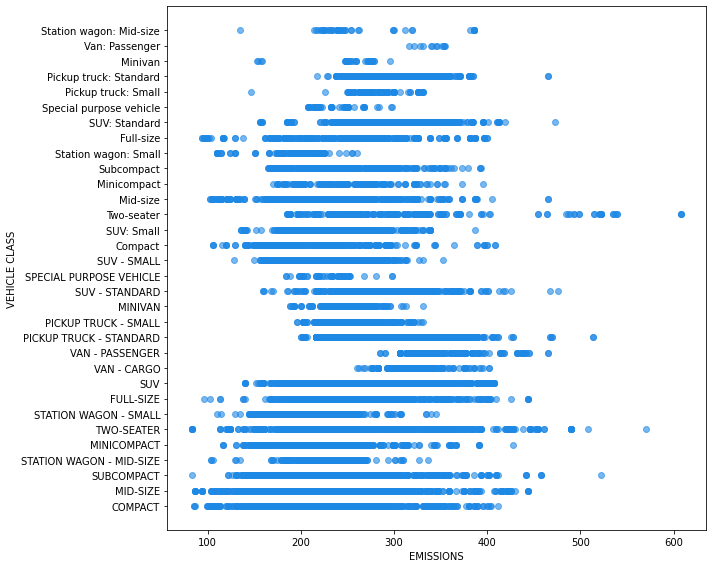

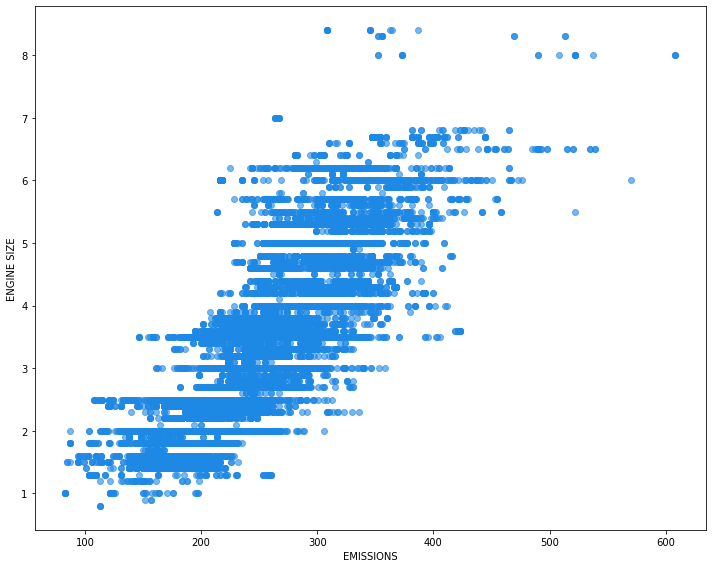

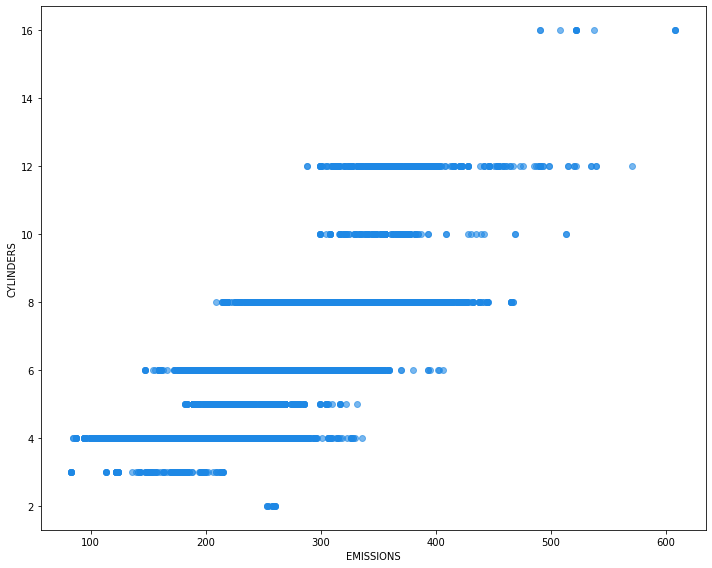

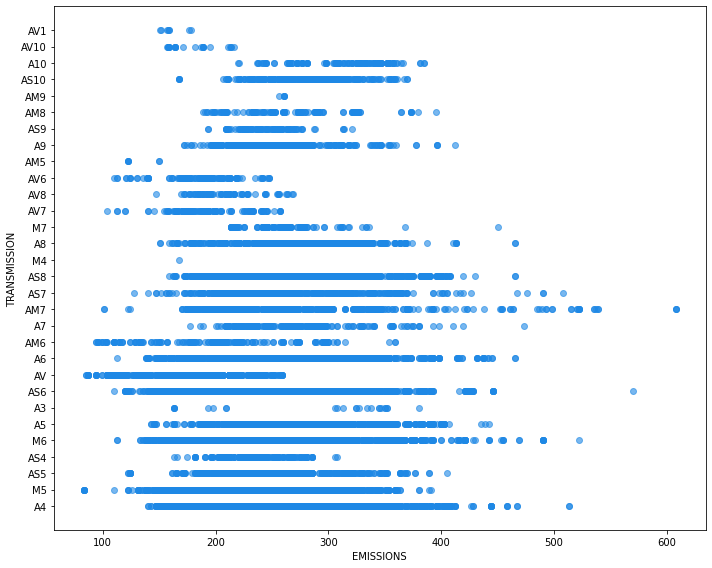

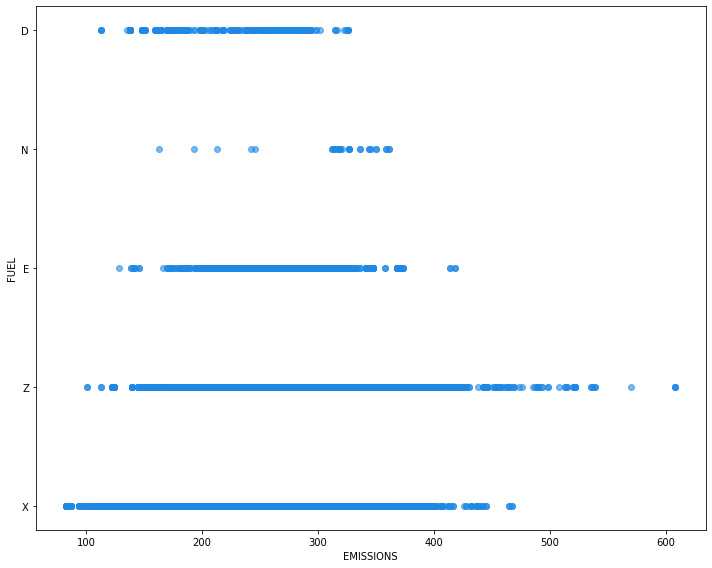

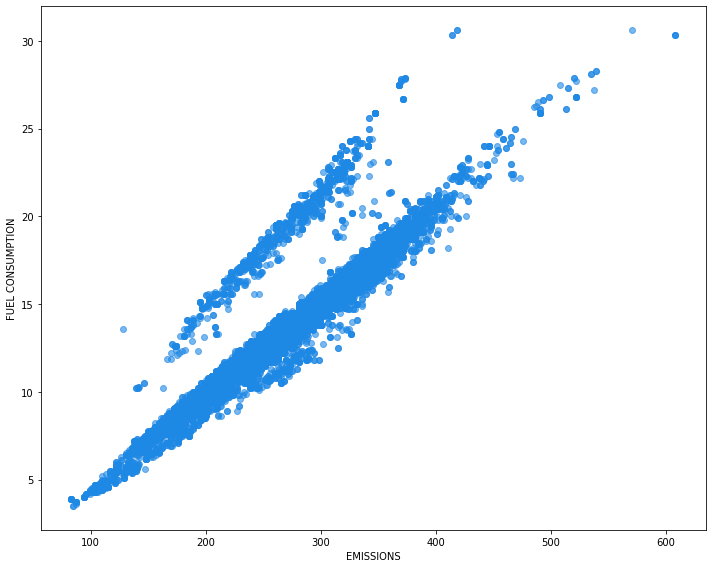

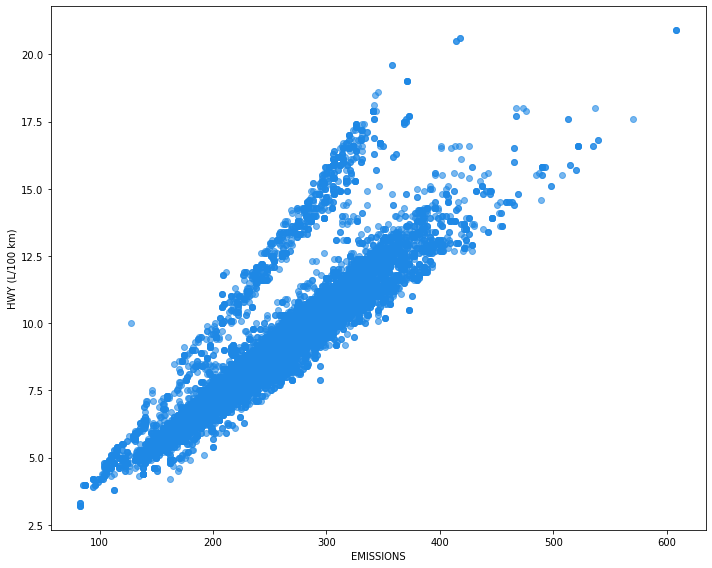

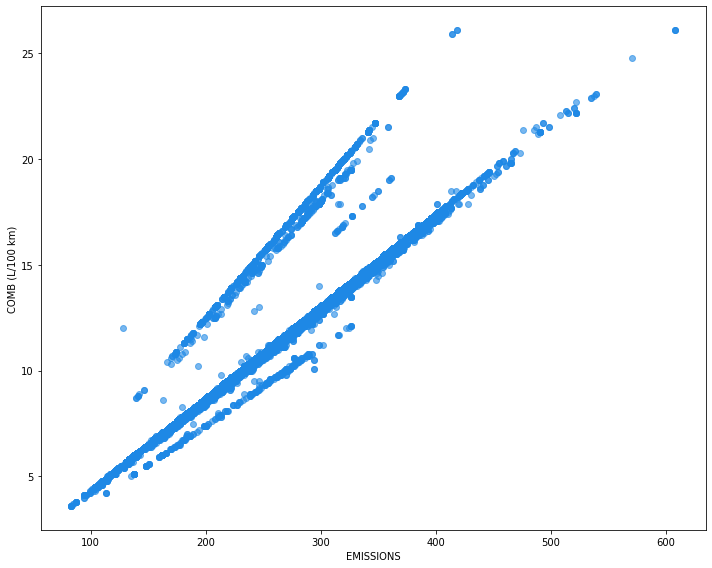

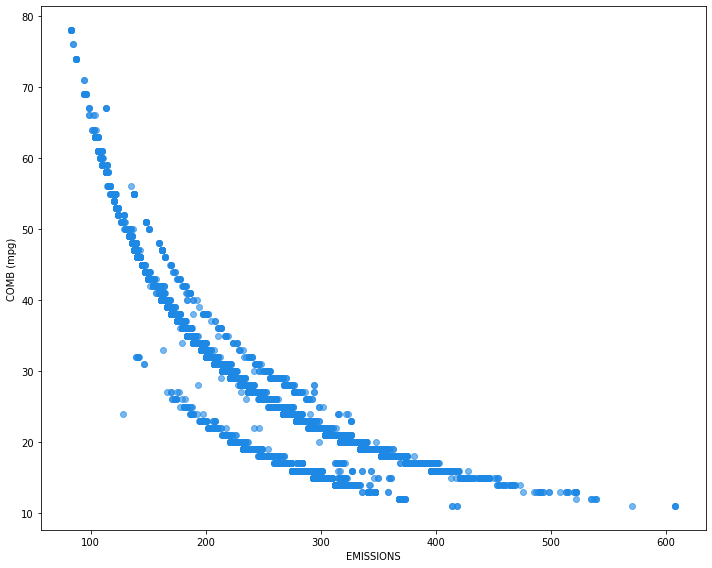

In [10]:
import matplotlib.pyplot as plt

# Define EMISSIONS as our labels and select features to compare with
targets_cols = ['EMISSIONS']  
features_cols = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']

num_features = len(features_cols)

# scatter plots
for feature_col in features_cols:
    fig, axs = plt.subplots(1, len(targets_cols), figsize=(10, 8))
    for target_col in targets_cols:
        axs.scatter(Dataset_initial[target_col], Dataset_initial[feature_col], color='#1E88E5', alpha=0.6)
        axs.set_xlabel(target_col)
        axs.set_ylabel(feature_col)
    plt.tight_layout()
    plt.show()


In [11]:
#Break down Emission to low, medium and high
Dataset_initial["CO2 Emission Class"] = pd.cut(Dataset_initial["EMISSIONS"],
                               bins=[0.,160, 255,np.inf],
                               labels=["low", "medium", "high"])

In [12]:
# CO2 Emission Class distribution
print(Dataset_initial["CO2 Emission Class"].value_counts())

CO2 Emission Class
medium    12338
high       9287
low         931
Name: count, dtype: int64


In [13]:
# CYLINDERS distribution
print(Dataset_initial["CYLINDERS"].value_counts())

CYLINDERS
4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: count, dtype: int64


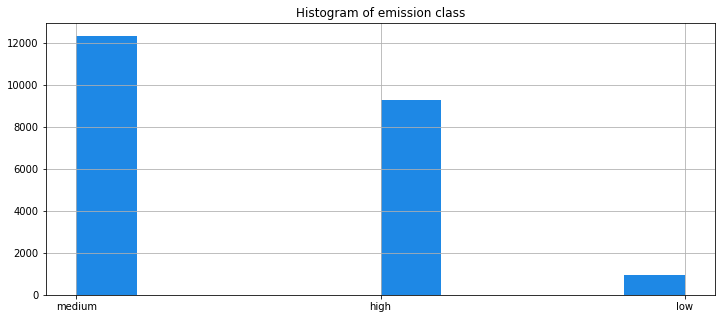

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# histogram for "Emission"
plt.plot(1, 2, 1)
Dataset_initial["CO2 Emission Class"].hist(color='#1E88E5')
plt.title('Histogram of emission class')


plt.show()


In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

# Change the "CO2 Emission Class" column into one-hot encoding
emission_cat = Dataset_initial[["CO2 Emission Class"]]
emission_cat_1hot = cat_encoder.fit_transform(emission_cat)

In [16]:
import pandas as pd

emission_cat_1hot_df = pd.DataFrame(emission_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "CO2 Emission Class" data into the initial dataset
Full_dataset = pd.concat([Dataset_initial, emission_cat_1hot_df], axis=1)



In [17]:
# See the result
Full_dataset.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0


In [18]:
# Change the "FUEL" column into one-hot encoding

fuel_cat =  Dataset_initial[['FUEL']]
fuel_cat_1hot = cat_encoder.fit_transform(fuel_cat)

fuel_cat_1hot_df = pd.DataFrame(fuel_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "FUEL" data into the initial dataset
Full_dataset2 = pd.concat([Full_dataset, fuel_cat_1hot_df], axis=1)

In [19]:
#Display all columns
pd.set_option('display.max_columns', None)

In [20]:
# See the result
Full_dataset2.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Change the "TRANSMISSION" column into one-hot encoding

TRANSMISSION_cat =  Dataset_initial[['TRANSMISSION']]
TRANSMISSION_cat_1hot = cat_encoder.fit_transform(TRANSMISSION_cat)

TRANSMISSION_cat_1hot_df = pd.DataFrame(TRANSMISSION_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Add the one-hot encoded "TRANSMISSION" data into the initial dataset
Full_dataset3 = pd.concat([Full_dataset2, TRANSMISSION_cat_1hot_df], axis=1)

In [22]:
# See the result
Full_dataset3.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Save for further use
Full_dataset3.to_csv('Full_dataset3.csv')

In [2]:
import pandas as pd
Full_dataset3 = pd.read_csv('Full_dataset3.csv')

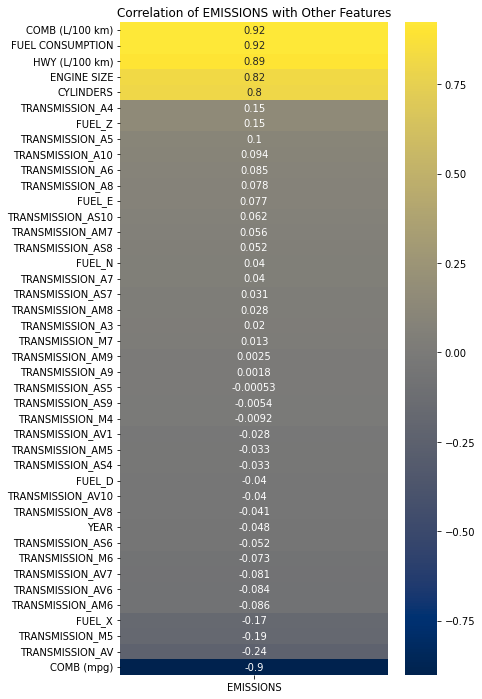

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# drop non numeric columns
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

emission_corr = correlation_matrix['EMISSIONS']
emission_corr_df = emission_corr.drop(['EMISSIONS', 'Unnamed: 0', 'CO2 Emission Class_high',
                                      'CO2 Emission Class_low', 'CO2 Emission Class_medium']).to_frame()

# Sort correlation values
emission_corr_df_sorted = emission_corr_df.sort_values(by='EMISSIONS', ascending=False)

# Plotting
plt.figure(figsize=(6, 12))
sns.heatmap(emission_corr_df_sorted, annot=True, cmap='cividis')
plt.title('Correlation of EMISSIONS with Other Features')
plt.show()


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
np.random.seed(42)

# Define features and labels
features = Full_dataset3.drop(["CO2 Emission Class_high", "CO2 Emission Class_low", "CO2 Emission Class_medium"], axis=1)
target = Full_dataset3["CO2 Emission Class"]

# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features, target):
    stratified_train = features.loc[train_index]
    stratified_test = features.loc[test_index]

# Proportion of each class in the test set  
stratified_test["CO2 Emission Class"].value_counts() / len(stratified_test)

CO2 Emission Class
medium    0.546986
high      0.411791
low       0.041223
Name: count, dtype: float64

In [4]:
# Proportion of each class in the full data
Full_dataset3["CO2 Emission Class"].value_counts() / len(Full_dataset3)

CO2 Emission Class
medium    0.546994
high      0.411731
low       0.041275
Name: count, dtype: float64

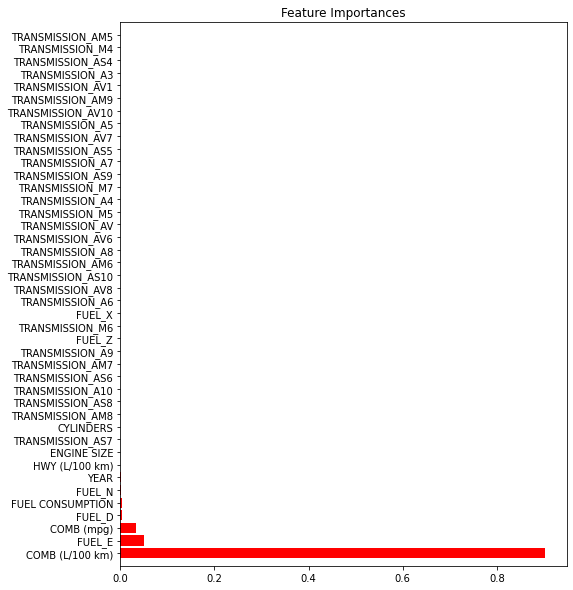

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Select columns with numeric values
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Define features and labels for the random forest regressor
X = numeric_data.drop(['EMISSIONS',"CO2 Emission Class_high", "CO2 Emission Class_low", "CO2 Emission Class_medium",
                       'Unnamed: 0'] , axis=1)
y = numeric_data['EMISSIONS']

# Train a RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center") 
plt.yticks(range(X.shape[1]), X.columns[indices])  
plt.ylim([-1, X.shape[1]])  # y-axis limit
plt.show()


In [5]:
# Define linear features
Linear_data_train = stratified_train[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]
Linear_data_test = stratified_test[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]
# Define labels
label_train = stratified_train["EMISSIONS"]
label_test = stratified_test["EMISSIONS"]

# Define Random forest-selected features
RandomFregressot_data_train = stratified_train[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]
RandomFregressot_data_test = stratified_test[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]

# Defin all features (remove labels and select only numeric values) 
All_data_train = (stratified_train.drop(['EMISSIONS',"CO2 Emission Class"] , axis=1)).select_dtypes(include=['number'])
All_data_test = (stratified_test.drop(['EMISSIONS',"CO2 Emission Class"] , axis=1)).select_dtypes(include=['number'])

In [6]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()

# Scale linear features
scaled_linear_data_train = scaler.fit_transform(Linear_data_train)
scaled_linear_data_test = scaler.fit_transform(Linear_data_test)

# Scale Random forest-selected features
scaled_RandomFRegg_train = scaler.fit_transform(RandomFregressot_data_train)
scaled_RandomFRegg_test = scaler.fit_transform(RandomFregressot_data_test)

# Scale all features
scaled_alldata_train = scaler.fit_transform(All_data_train.drop(['Unnamed: 0'], axis=1))
scaled_alldata_test = scaler.fit_transform(All_data_test.drop(['Unnamed: 0'], axis=1))

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Model evaluation function on validation set
def evaluate_model_with_validation(model, X_train, y_train, X_val, y_val):
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Model evaluation function on validation set + Plotting
def plot_learning_curves_and_evaluate(model, X_train, y_train, X_val, y_val, xlim=None, ylim=None):

    # Store train set and validation set error
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # Plotting
    plt.figure(figsize=(7, 4))
    plt.grid()
    plt.plot(np.sqrt(train_errors), "-+", color="orange", label="train")
    plt.plot(np.sqrt(val_errors), "-", color="blue", label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Adjust title based on whether axis limits are defined or not
    if xlim is not None and ylim is not None:
        title = f'Validation vs Training in a Specific Range - {model_name}'
    else:
        title = f'Validation vs Training in the whole dataset - {model_name}'
    
    plt.title(title, fontsize=14)
    
    # Apply axis limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    # Evaluate model
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')
    
    plt.show()


In [10]:
#Empty data set to store the best score of each model based on the validation set
regression_performance = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

In [11]:
# Define a function to manually add model performance
def add_model_performance(df, model_name, rmse, mae):
    df_length = len(df)
    df.loc[df_length] = [model_name, rmse, mae]

In [7]:
from sklearn.model_selection import train_test_split

#split training data into train and validation set based on linear features
x_train_linerD, x_val_linerD, y_train_linerD, y_val_linerD = train_test_split(scaled_linear_data_train, label_train,
                                                                              test_size=0.2, random_state=10)

In [8]:
#split training data into train and validation set based on random forest-selected features
x_train_RandomFD, x_val_RandomFD, y_train_RandomFD, y_val_RandomFD = train_test_split(RandomFregressot_data_train, label_train,
                                                                              test_size=0.2, random_state=10)

In [9]:
#split training data into train and validation set on all features
x_train_AllD, x_val_AllD, y_train_AllD, y_val_AllD = train_test_split(scaled_alldata_train, label_train,
                                                                              test_size=0.2, random_state=10)

LinearRegression Training Set RMSE: 19.40
LinearRegression Training Set MAE: 11.68
LinearRegression Validation Set RMSE: 19.41
LinearRegression Validation Set MAE: 11.85


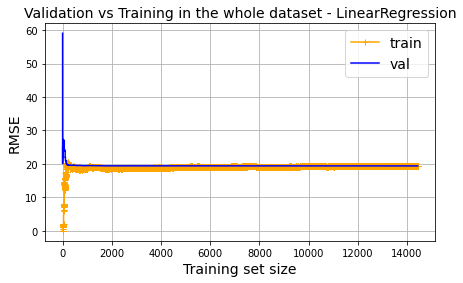

In [38]:
from sklearn.linear_model import LinearRegression

# LinearRegression on linear features
lin_reg = LinearRegression()
lin_reg.fit(x_train_linerD, y_train_linerD)

plot_learning_curves_and_evaluate(lin_reg, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD )

In [12]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'LinearRegression + linear features', 19.41, 11.85)

LinearRegression Training Set RMSE: 4.40
LinearRegression Training Set MAE: 2.34
LinearRegression Validation Set RMSE: 4.58
LinearRegression Validation Set MAE: 2.41


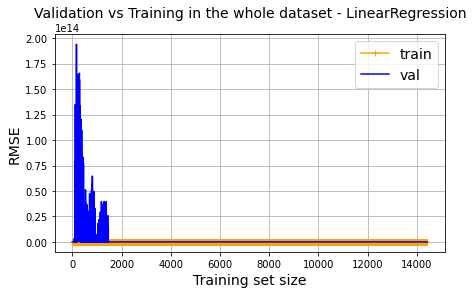

In [40]:
from sklearn.linear_model import LinearRegression

# LinearRegression on all features
lin_reg_AllD = LinearRegression()
lin_reg_AllD.fit(x_train_AllD, y_train_AllD)

plot_learning_curves_and_evaluate(lin_reg_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

In [13]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'LinearRegression + All features', 4.58, 2.41)

LinearRegression Training Set RMSE: 6.59
LinearRegression Training Set MAE: 3.58
LinearRegression Validation Set RMSE: 6.83
LinearRegression Validation Set MAE: 3.66


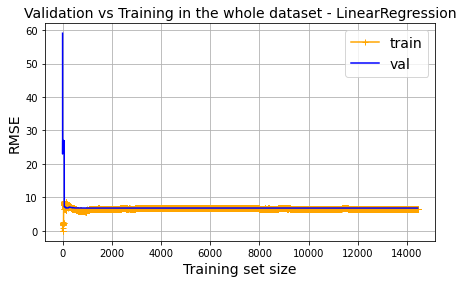

In [42]:
from sklearn.linear_model import LinearRegression

# LinearRegression on random forest-selected features
lin_reg_RandomFD = LinearRegression()
lin_reg_RandomFD.fit(x_train_RandomFD, y_train_RandomFD)

plot_learning_curves_and_evaluate(lin_reg_RandomFD, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [14]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'LinearRegression + RandomF features', 6.83, 3.66)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# polynomial regression on linear features
# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2, 3]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_linerD, y_train_linerD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 3


Pipeline Training Set RMSE: 13.79
Pipeline Training Set MAE: 6.88
Pipeline Validation Set RMSE: 14.89
Pipeline Validation Set MAE: 7.23


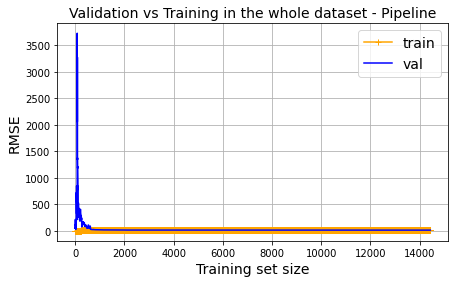

In [45]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves_and_evaluate(polynomial_regression, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

In [15]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'polynomial regression + linear features', 14.89, 7.23)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# polynomial regression on random forest-selected features
# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2, 3]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_RandomFD, y_train_RandomFD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 3


Pipeline Training Set RMSE: 5.25
Pipeline Training Set MAE: 2.75
Pipeline Validation Set RMSE: 5.45
Pipeline Validation Set MAE: 2.79


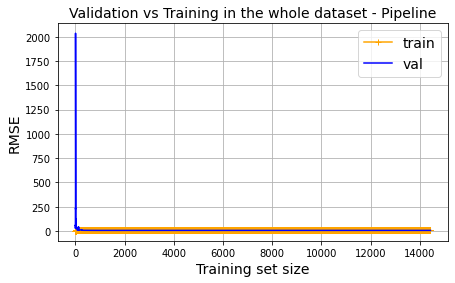

In [49]:
polynomial_regression2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression2.fit(x_train_RandomFD, y_train_RandomFD)

plot_learning_curves_and_evaluate(polynomial_regression2, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [16]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'polynomial regression + Random Forest features', 5.45, 2.79)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# polynomial regression on all features
# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_AllD, y_train_AllD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 2


In [53]:
polynomial_regression3 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression3.fit(x_train_AllD, y_train_AllD)

evaluate_model_with_validation(polynomial_regression3, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(polynomial_regression3, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

Pipeline Training Set RMSE: 1.38
Pipeline Training Set MAE: 0.89
Pipeline Validation Set RMSE: 47666477.91
Pipeline Validation Set MAE: 793453.34


In [17]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'polynomial regression + All features', 47666477.91, 793453.34)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor on random forest-selected features
param_grid = [
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(x_train_RandomFD, y_train_RandomFD)

RandomForestRegg_best_estimator = grid_search_forest.best_estimator_

evaluate_model_with_validation(RandomForestRegg_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(RandomForestRegg_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

RandomForestRegressor Training Set RMSE: 5.02
RandomForestRegressor Training Set MAE: 2.69
RandomForestRegressor Validation Set RMSE: 5.46
RandomForestRegressor Validation Set MAE: 2.80


In [18]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Random Forest + RandomForest features', 5.46, 2.80)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# RandomForestRegressor on all features
param_grid = [
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
 
rnd_search_forest = RandomizedSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rnd_search_forest.fit(x_train_AllD, y_train_AllD)

RandomForestRegg_best_estimator_AllD = rnd_search_forest.best_estimator_

evaluate_model_with_validation(RandomForestRegg_best_estimator_AllD, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(RandomForestRegg_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

RandomForestRegressor Training Set RMSE: 0.05
RandomForestRegressor Training Set MAE: 0.00
RandomForestRegressor Validation Set RMSE: 1.97
RandomForestRegressor Validation Set MAE: 0.33


In [19]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Random Forest + All features', 1.97,  0.33)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# RandomForestRegressor on linear features
param_grid = [
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

rnd_search_forest = RandomizedSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rnd_search_forest.fit(x_train_linerD, y_train_linerD)

RandomForestRegg_best_estimator_linerD = rnd_search_forest.best_estimator_

evaluate_model_with_validation(RandomForestRegg_best_estimator_linerD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(RandomForestRegg_best_estimator_linerD, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

RandomForestRegressor Training Set RMSE: 3.30
RandomForestRegressor Training Set MAE: 0.98
RandomForestRegressor Validation Set RMSE: 8.33
RandomForestRegressor Validation Set MAE: 2.31


In [20]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Random Forest + linear features', 8.33,  2.31)

DecisionTreeRegressor Training Set RMSE: 5.26
DecisionTreeRegressor Training Set MAE: 2.82
DecisionTreeRegressor Validation Set RMSE: 5.61
DecisionTreeRegressor Validation Set MAE: 2.91


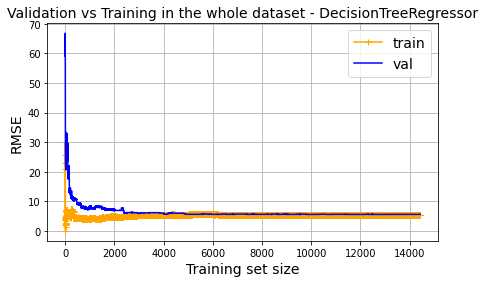

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegressor on random forest-selected features
# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_RandomFD, y_train_RandomFD)

DescionTRegg_best_estimator = grid_search_tree.best_estimator_

plot_learning_curves_and_evaluate(DescionTRegg_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

In [21]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Decision Tree + RandomForest features', 5.61, 2.91)

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegressor on linear features
# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_linerD, y_train_linerD)

DescionTRegg_best_estimator_linearD = grid_search_tree.best_estimator_

evaluate_model_with_validation(DescionTRegg_best_estimator_linearD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(DescionTRegg_best_estimator_linearD, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

DecisionTreeRegressor Training Set RMSE: 11.30
DecisionTreeRegressor Training Set MAE: 4.72
DecisionTreeRegressor Validation Set RMSE: 12.43
DecisionTreeRegressor Validation Set MAE: 5.05


In [22]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Decision Tree + linear features', 12.43, 5.05)

DecisionTreeRegressor Training Set RMSE: 3.19
DecisionTreeRegressor Training Set MAE: 2.31
DecisionTreeRegressor Validation Set RMSE: 3.86
DecisionTreeRegressor Validation Set MAE: 2.44


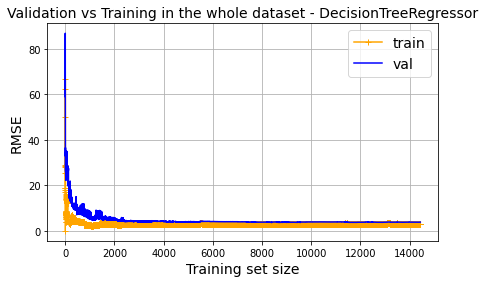

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegressor on all features
# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_AllD, y_train_AllD)

DescionTRegg_best_estimator = grid_search_tree.best_estimator_

plot_learning_curves_and_evaluate(DescionTRegg_best_estimator, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

In [23]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Decision Tree + All features', 3.86, 2.44)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor on random forest-selected features
#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_RandomFD, y_train_RandomFD)

knn_best_estimator = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

KNeighborsRegressor Training Set RMSE: 5.77
KNeighborsRegressor Training Set MAE: 2.85
KNeighborsRegressor Validation Set RMSE: 6.57
KNeighborsRegressor Validation Set MAE: 3.06


In [24]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'KNN + RandomForest features', 6.57, 3.06)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor on all features
#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_AllD, y_train_AllD)

knn_best_estimator_AllD = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator_AllD, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

KNeighborsRegressor Training Set RMSE: 0.07
KNeighborsRegressor Training Set MAE: 0.00
KNeighborsRegressor Validation Set RMSE: 3.59
KNeighborsRegressor Validation Set MAE: 1.71


In [25]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'KNN + All features', 3.59, 1.71)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor on linear features
#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_linerD, y_train_linerD)

knn_best_estimator_linearD = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator_linearD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

KNeighborsRegressor Training Set RMSE: 4.01
KNeighborsRegressor Training Set MAE: 0.96
KNeighborsRegressor Validation Set RMSE: 8.37
KNeighborsRegressor Validation Set MAE: 2.24


In [26]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'KNN + linear features', 8.37, 2.24)

In [75]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# xgboost on random forest-selected features
#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_RandomFD, y_train_RandomFD)

xgb_best_estimator = rnd_search_xgb.best_estimator_

evaluate_model_with_validation(xgb_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(xgb_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

XGBRegressor Training Set RMSE: 5.03
XGBRegressor Training Set MAE: 2.70
XGBRegressor Validation Set RMSE: 5.38
XGBRegressor Validation Set MAE: 2.81


In [27]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'XGB + RandomForest features', 5.38, 2.81)

In [78]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# xgboost on all features
#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_AllD, y_train_AllD)

xgb_best_estimator_AllD = rnd_search_xgb.best_estimator_

evaluate_model_with_validation(xgb_best_estimator_AllD, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(xgb_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

XGBRegressor Training Set RMSE: 0.61
XGBRegressor Training Set MAE: 0.36
XGBRegressor Validation Set RMSE: 1.48
XGBRegressor Validation Set MAE: 0.55


In [28]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'XGB + All features', 1.48, 0.55)

In [80]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# xgboost on linear features
#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_linerD, y_train_linerD)

xgb_best_estimator_linearD = rnd_search_xgb.best_estimator_

evaluate_model_with_validation(xgb_best_estimator_linearD, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(xgb_best_estimator_linearD, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

XGBRegressor Training Set RMSE: 3.29
XGBRegressor Training Set MAE: 1.57
XGBRegressor Validation Set RMSE: 7.40
XGBRegressor Validation Set MAE: 2.56


In [29]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'XGB + linear features', 7.40, 2.56)

Ridge Training Set RMSE: 6.59
Ridge Training Set MAE: 3.58
Ridge Validation Set RMSE: 6.83
Ridge Validation Set MAE: 3.66


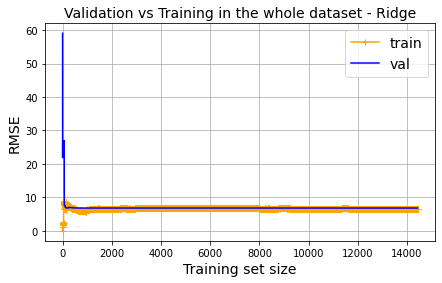

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge on random forest-selected features
param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']
}


ridge_reg = Ridge(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridge.fit(x_train_RandomFD, y_train_RandomFD)

ridge_best_estimator = grid_search_ridge.best_estimator_

plot_learning_curves_and_evaluate(ridge_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [30]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Ridge + RandomForest features', 6.83, 3.66)

Ridge Training Set RMSE: 4.40
Ridge Training Set MAE: 2.34
Ridge Validation Set RMSE: 4.58
Ridge Validation Set MAE: 2.41


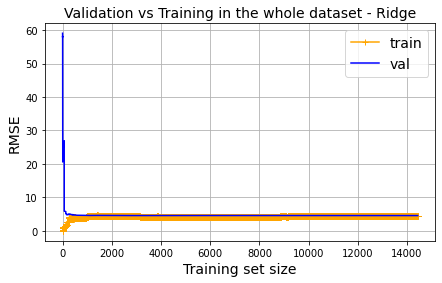

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge on all features
param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']
}


ridge_reg = Ridge(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridge.fit(x_train_AllD, y_train_AllD)

ridge_best_estimator_AllD = grid_search_ridge.best_estimator_

plot_learning_curves_and_evaluate(ridge_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

In [31]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Ridge + All features', 4.58, 2.41)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Training Set RMSE: 6.61
Lasso Training Set MAE: 3.67
Lasso Validation Set RMSE: 6.83
Lasso Validation Set MAE: 3.74


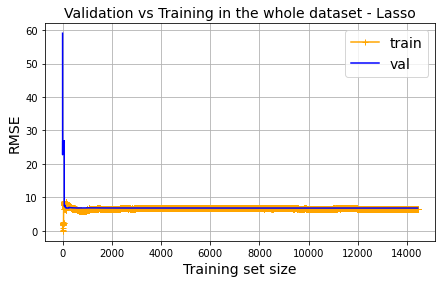

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
 
# Lasso on random forest-selected features
param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2),
}

lasso_regg = Lasso(max_iter=10000, random_state=42)

# Create the GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(x_train_RandomFD, y_train_RandomFD)

lasso_best_estimator = grid_search_lasso.best_estimator_

plot_learning_curves_and_evaluate(lasso_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [32]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Lasso + RandomForest features', 6.83, 3.74)

In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Lasso on all features
param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2),
}

lasso_regg = Lasso(max_iter=10000, random_state=42)

# Create the GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(x_train_AllD, y_train_AllD)

lasso_best_estimator_AllD = grid_search_lasso.best_estimator_

evaluate_model_with_validation(lasso_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(lasso_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

Lasso Training Set RMSE: 4.44
Lasso Training Set MAE: 2.40
Lasso Validation Set RMSE: 4.60
Lasso Validation Set MAE: 2.47


In [33]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'Lasso + All features', 4.60, 2.47)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet Training Set RMSE: 6.61
ElasticNet Training Set MAE: 3.67
ElasticNet Validation Set RMSE: 6.83
ElasticNet Validation Set MAE: 3.74


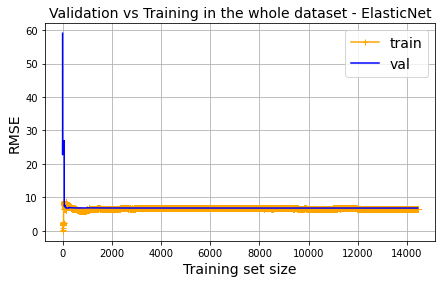

In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# ElasticNet on random forest-selected features
param_grid_elastic = {
    'alpha': np.arange(0.1, 5.1, 0.2),     # Range of alpha values
    'l1_ratio': np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
}

elastic_net = ElasticNet(random_state=42)


# Create the grid search
elastic_net_grid_search = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

elastic_net_grid_search.fit(x_train_RandomFD, y_train_RandomFD)

elastic_net_best_estimator = elastic_net_grid_search.best_estimator_

plot_learning_curves_and_evaluate(elastic_net_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [34]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'ElasticNet + RandomForest features', 6.83, 3.74)

In [92]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# ElasticNet on all features
param_grid_elastic = {
    'alpha': np.arange(0.1, 5.1, 0.2),     # Range of alpha values
    'l1_ratio': np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
}

elastic_net = ElasticNet(random_state=42)


# Create the grid search
elastic_net_grid_search = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

elastic_net_grid_search.fit(x_train_AllD, y_train_AllD)

elastic_net_best_estimator_AllD = elastic_net_grid_search.best_estimator_

evaluate_model_with_validation(elastic_net_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(elastic_net_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

ElasticNet Training Set RMSE: 4.47
ElasticNet Training Set MAE: 2.43
ElasticNet Validation Set RMSE: 4.62
ElasticNet Validation Set MAE: 2.50


/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.900e+03, tolerance: 5.097e+03
  model = cd_fast.enet_coordinate_descent(


In [35]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'ElasticNet + All features', 4.62, 2.50)

In [94]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#SGD (no penatly) on random forest-selected features
# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_RandomFD, y_train_RandomFD)

SGD_best_estimator = SGD_grid_search.best_estimator_

evaluate_model_with_validation(SGD_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

SGDRegressor Training Set RMSE: 6.89
SGDRegressor Training Set MAE: 2.98
SGDRegressor Validation Set RMSE: 7.16
SGDRegressor Validation Set MAE: 3.08


In [36]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(No penalty) + RandomForest features', 7.16, 3.08)

In [96]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#SGD (no penatly) on all features
# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_AllD, y_train_AllD)

SGD_best_estimator_AllD = SGD_grid_search.best_estimator_

evaluate_model_with_validation(SGD_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

SGDRegressor Training Set RMSE: 7681262.04
SGDRegressor Training Set MAE: 77062.92
SGDRegressor Validation Set RMSE: 249511.88
SGDRegressor Validation Set MAE: 13073.80


In [37]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(No penalty) + All features', 249511.88, 13073.80)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1 on random forest-selected features
# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1 penalty
sgd_reg_l1 = SGDRegressor(penalty="l1", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search 
grid_search_sgd_l1 = GridSearchCV(sgd_reg_l1, param_grid_sgd_l1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1.fit(x_train_RandomFD, y_train_RandomFD)

SGD_l1_best_estimator = grid_search_sgd_l1.best_estimator_

evaluate_model_with_validation(SGD_l1_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_l1_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

SGDRegressor Training Set RMSE: 8.76
SGDRegressor Training Set MAE: 5.98
SGDRegressor Validation Set RMSE: 8.87
SGDRegressor Validation Set MAE: 5.94


In [38]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L1) + RandomForest features', 8.87, 5.94)

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
#SGD + L1 on all features
# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1 penalty
sgd_reg_l1 = SGDRegressor(penalty="l1", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search 
random_search_sgd_l1 = RandomizedSearchCV(sgd_reg_l1, param_grid_sgd_l1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search_sgd_l1.fit(x_train_AllD, y_train_AllD)

SGD_l1_best_estimator_AllD = random_search_sgd_l1.best_estimator_

evaluate_model_with_validation(SGD_l1_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_l1_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

SGDRegressor Training Set RMSE: 273769043819.08
SGDRegressor Training Set MAE: 17063849869.13
SGDRegressor Validation Set RMSE: 250753404832.36
SGDRegressor Validation Set MAE: 15300072120.95


In [39]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L1) + All features', 250753404832.36, 15300072120.95)

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L2 on random forest-selected features
# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L2 penalty
sgd_reg_l2 = SGDRegressor(penalty="l2", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=10)

# Create the grid search
grid_search_sgd_l2 = GridSearchCV(sgd_reg_l2, param_grid_sgd_l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l2.fit(x_train_RandomFD, y_train_RandomFD)

SGD_l2_best_estimator = grid_search_sgd_l2.best_estimator_

evaluate_model_with_validation(SGD_l2_best_estimator,x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_l2_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

SGDRegressor Training Set RMSE: 201.52
SGDRegressor Training Set MAE: 112.93
SGDRegressor Validation Set RMSE: 200.95
SGDRegressor Validation Set MAE: 111.05


In [40]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L2) + RandomForest features', 200.95, 111.05)

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L2 on all features
# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L2 penalty
sgd_reg_l2 = SGDRegressor(penalty="l2", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=10)

# Create the grid search
grid_search_sgd_l2 = GridSearchCV(sgd_reg_l2, param_grid_sgd_l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l2.fit(x_train_AllD, y_train_AllD)

SGD_l2_best_estimator_AllD = grid_search_sgd_l2.best_estimator_

evaluate_model_with_validation(SGD_l2_best_estimator_AllD,x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_l2_best_estimator, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

SGDRegressor Training Set RMSE: 12.45
SGDRegressor Training Set MAE: 9.24
SGDRegressor Validation Set RMSE: 12.28
SGDRegressor Validation Set MAE: 9.17


In [41]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L2) + All features', 12.28, 9.17)

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1L2 on random forest-selected features
# hyperparameters to search
param_grid_sgd_l1l2 = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' :  np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1L2 penalty
sgd_reg_l1l2 = SGDRegressor(penalty="elasticnet", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search
grid_search_sgd_l1l2 = GridSearchCV(sgd_reg_l1l2, param_grid_sgd_l1l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1l2.fit(x_train_RandomFD, y_train_RandomFD)

SGD_L1l2_best_estimator = grid_search_sgd_l1l2.best_estimator_

evaluate_model_with_validation(SGD_L1l2_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_L1l2_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

SGDRegressor Training Set RMSE: 8.76
SGDRegressor Training Set MAE: 5.98
SGDRegressor Validation Set RMSE: 8.87
SGDRegressor Validation Set MAE: 5.94


In [42]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L1L2) + RandomForest features', 8.87, 5.94)

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1L2 on all features
# hyperparameters to search
param_grid_sgd_l1l2 = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' :  np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1L2 penalty
sgd_reg_l1l2 = SGDRegressor(penalty="elasticnet", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search
grid_search_sgd_l1l2 = GridSearchCV(sgd_reg_l1l2, param_grid_sgd_l1l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1l2.fit(x_train_AllD, y_train_AllD)

SGD_L1l2_best_estimator_AllD = grid_search_sgd_l1l2.best_estimator_

evaluate_model_with_validation(SGD_L1l2_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
# Avoid Plotting due to being time consuming
#plot_learning_curves_and_evaluate(SGD_L1l2_best_estimator, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

SGDRegressor Training Set RMSE: 8.41
SGDRegressor Training Set MAE: 5.85
SGDRegressor Validation Set RMSE: 8.36
SGDRegressor Validation Set MAE: 5.89


In [43]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'SGD(+L1L2) + All features', 8.36, 5.89)

In [111]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers
import keras_tuner as kt

In [112]:
# Check the input shapes of Random Forest-selected features and all features
print("input shape of random forest selected features:", x_train_RandomFD.shape)
print("input shape of all features:", x_train_AllD.shape)

input shape of random forest selected features: (14435, 3)
input shape of all features: (14435, 42)


In [113]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_ForestFea", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 02m 13s]
val_mean_absolute_error: 94.3412857055664

Best val_mean_absolute_error So Far: 7.022698402404785
Total elapsed time: 00h 07m 42s


In [114]:
# Summary of the random search
(random_search_tuner.oracle.get_best_trials(num_trials=1)[0]).summary()

Trial 3 summary
Hyperparameters:
n_hidden: 0
n_neurons: 150
learning_rate: 0.00028078309037793175
optimizer: Adam
activation: elu
Score: 7.022698402404785


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8883 - mean_absolute_error: 6.8883 - val_loss: 7.0056 - val_mean_absolute_error: 7.0056
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8712 - mean_absolute_error: 6.8712 - val_loss: 6.9948 - val_mean_absolute_error: 6.9948
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8543 - mean_absolute_error: 6.8543 - val_loss: 6.9704 - val_mean_absolute_error: 6.9704
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8377 - mean_absolute_error: 6.8377 - val_loss: 6.9523 - val_mean_absolute_error: 6.9523
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8208 - mean_absolute_error: 6.8208 - val_loss: 6.9378 - val_mean_absolute_error: 6.9378
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8039 - mean_absolute_error: 6.8039 - val_loss: 6.9178 - val_mean_absolute_error: 6.9178
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.2270 - mean_absolute_error: 5.2270 - val_loss: 5.3077 - val_mean_absolute_error: 5.3077
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.2112 - mean_absolute_error: 5.2112 - val_loss: 5.2898 - val_mean_absolute_error: 5.2898


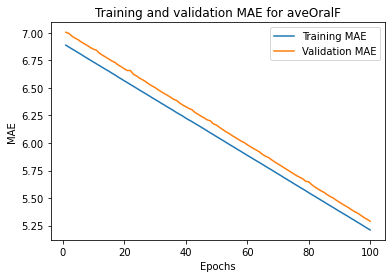

In [115]:
Forest_regg_data_random_search = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_random_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [44]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search (No regularizer) + RandomForest features', 'NA', 5.28)

In [117]:
# Save the weights
Forest_regg_data_random_search.save("Forest_regg_data_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [118]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on all data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_AllFea", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 02m 10s]
val_mean_absolute_error: 91.79878997802734

Best val_mean_absolute_error So Far: 1.8533740043640137
Total elapsed time: 00h 06m 43s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 1.9041 - mean_absolute_error: 1.9041 - val_loss: 1.9293 - val_mean_absolute_error: 1.9293
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8252 - mean_absolute_error: 1.8252 - val_loss: 2.0057 - val_mean_absolute_error: 2.0057
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8423 - mean_absolute_error: 1.8423 - val_loss: 1.8998 - val_mean_absolute_error: 1.8998
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7812 - mean_absolute_error: 1.7812 - val_loss: 2.7206 - val_mean_absolute_error: 2.7206
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8503 - mean_absolute_error: 1.8503 - val_loss: 1.7670 - val_mean_absolute_error: 1.7670
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7232 - mean_absolute_error: 1.7232 - val_loss: 1.6914 - val_mean_absolute_error: 1.6914
Epoch 7/10

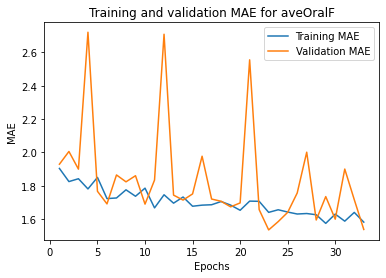

In [119]:
AllF_regg_data_random_search = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = AllF_regg_data_random_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [45]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search (No regularizer) + All features', 'NA', 1.53)

In [121]:
# Save the weights
AllF_regg_data_random_search.save("AllF_regg_data_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + L1 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_ForestFea_L1", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 23s]
val_mean_absolute_error: 12.749348640441895

Best val_mean_absolute_error So Far: 12.749348640441895
Total elapsed time: 00h 04m 59s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 12.5478 - mean_absolute_error: 12.5478 - val_loss: 12.2493 - val_mean_absolute_error: 12.2493
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 12.0280 - mean_absolute_error: 12.0280 - val_loss: 11.7494 - val_mean_absolute_error: 11.7494
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 11.5252 - mean_absolute_error: 11.5252 - val_loss: 11.2500 - val_mean_absolute_error: 11.2500
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 11.0149 - mean_absolute_error: 11.0149 - val_loss: 10.7746 - val_mean_absolute_error: 10.7746
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 10.5407 - mean_absolute_error: 10.5407 - val_loss: 10.3085 - val_mean_absolute_error: 10.3085
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 10.0692 - mean_absolute_error: 10.0692 - val_loss: 9.8724 - val_mean_absolute_er

452/452 [==============================] - 1s 2ms/step - loss: 6.9233 - mean_absolute_error: 6.9233 - val_loss: 7.0497 - val_mean_absolute_error: 7.0497
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 6.9186 - mean_absolute_error: 6.9186 - val_loss: 7.0437 - val_mean_absolute_error: 7.0437


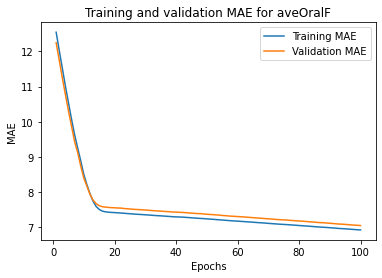

In [123]:
Forest_regg_data_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_random_search_l1.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [46]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+L1 + RandomForest features', 'NA', 7.04)

In [125]:
# Save the weights
Forest_regg_data_random_search_l1.save("Forest_regg_data_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [126]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on all data + L1 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_AllFea_L1", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 20s]
val_mean_absolute_error: 181.22512817382812

Best val_mean_absolute_error So Far: 1.4943842887878418
Total elapsed time: 00h 06m 04s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 2.5659 - mean_absolute_error: 1.6087 - val_loss: 2.5841 - val_mean_absolute_error: 1.6284
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5997 - mean_absolute_error: 1.6451 - val_loss: 2.7136 - val_mean_absolute_error: 1.7604
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5578 - mean_absolute_error: 1.6059 - val_loss: 2.5758 - val_mean_absolute_error: 1.6255
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5134 - mean_absolute_error: 1.5644 - val_loss: 2.5579 - val_mean_absolute_error: 1.6107
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5379 - mean_absolute_error: 1.5918 - val_loss: 2.4782 - val_mean_absolute_error: 1.5337
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5132 - mean_absolute_error: 1.5699 - val_loss: 2.5066 - val_mean_absolute_error: 1.5639
Epoch 7/10

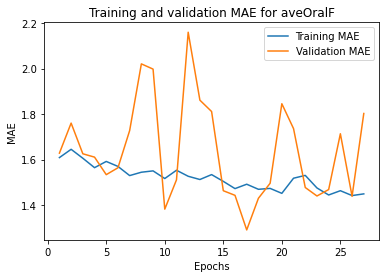

In [127]:
AllF_regg_data_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = AllF_regg_data_random_search_l1.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [47]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+L1 + All features', 'NA', 1.80)

In [129]:
# Save the weights
AllF_regg_data_random_search_l1.save("AllF_regg_data_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + L2 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_ForestFea_L2", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 18s]
val_mean_absolute_error: 12.749348640441895

Best val_mean_absolute_error So Far: 12.749348640441895
Total elapsed time: 00h 05m 31s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 12.5478 - mean_absolute_error: 12.5478 - val_loss: 12.2493 - val_mean_absolute_error: 12.2493
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 12.0280 - mean_absolute_error: 12.0280 - val_loss: 11.7494 - val_mean_absolute_error: 11.7494
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 11.5252 - mean_absolute_error: 11.5252 - val_loss: 11.2500 - val_mean_absolute_error: 11.2500
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 11.0149 - mean_absolute_error: 11.0149 - val_loss: 10.7746 - val_mean_absolute_error: 10.7746
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 10.5407 - mean_absolute_error: 10.5407 - val_loss: 10.3085 - val_mean_absolute_error: 10.3085
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 10.0692 - mean_absolute_error: 10.0692 - val_loss: 9.8724 - val_mean_absolute_er

452/452 [==============================] - 1s 1ms/step - loss: 6.9233 - mean_absolute_error: 6.9233 - val_loss: 7.0497 - val_mean_absolute_error: 7.0497
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 6.9186 - mean_absolute_error: 6.9186 - val_loss: 7.0437 - val_mean_absolute_error: 7.0437


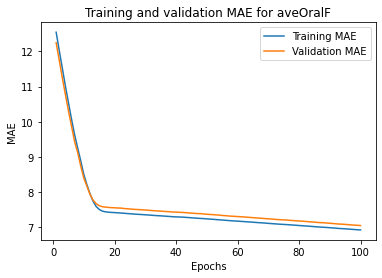

In [131]:
Forest_regg_data_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_random_search_l2.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [48]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+L2 + RandomForest features', 'NA', 7.04)

In [133]:
# Save the weights
Forest_regg_data_random_search_l2.save("Forest_regg_data_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [134]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on all data + L2 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_AllFea_L2", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 16s]
val_mean_absolute_error: 181.22512817382812

Best val_mean_absolute_error So Far: 1.3448199033737183
Total elapsed time: 00h 05m 17s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 2.2696 - mean_absolute_error: 1.3870 - val_loss: 2.4756 - val_mean_absolute_error: 1.5971
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2642 - mean_absolute_error: 1.3889 - val_loss: 2.2983 - val_mean_absolute_error: 1.4254
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2536 - mean_absolute_error: 1.3836 - val_loss: 2.4222 - val_mean_absolute_error: 1.5553
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2725 - mean_absolute_error: 1.4087 - val_loss: 2.3775 - val_mean_absolute_error: 1.5168
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2026 - mean_absolute_error: 1.3462 - val_loss: 2.3365 - val_mean_absolute_error: 1.4840
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2724 - mean_absolute_error: 1.4221 - val_loss: 2.5461 - val_mean_absolute_error: 1.6991
Epoch 7/10

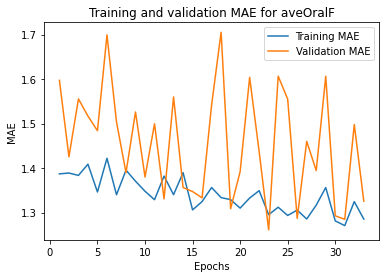

In [135]:
AllD_regg_data_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = AllD_regg_data_random_search_l2.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [49]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+L2 + All features', 'NA', 1.32)

In [137]:
# Save the weights
AllD_regg_data_random_search_l2.save("AllD_regg_data_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [138]:
import keras_tuner as kt
import tensorflow as tf
import random
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + Dropout
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    #Define the number of hidden layers, neurons and learning rate value    
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation="relu")(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout layer for regularization

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation="relu")(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_ForestFea_Dtopout", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 20s]
val_mean_absolute_error: 77.09838104248047

Best val_mean_absolute_error So Far: 7.877574443817139
Total elapsed time: 00h 05m 10s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 40.4241 - mean_absolute_error: 40.4241 - val_loss: 22.1152 - val_mean_absolute_error: 22.1152
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 40.3572 - mean_absolute_error: 40.3572 - val_loss: 16.9788 - val_mean_absolute_error: 16.9788
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 40.0661 - mean_absolute_error: 40.0661 - val_loss: 17.5684 - val_mean_absolute_error: 17.5684
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 39.6692 - mean_absolute_error: 39.6692 - val_loss: 23.7896 - val_mean_absolute_error: 23.7896
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 39.2994 - mean_absolute_error: 39.2994 - val_loss: 19.3960 - val_mean_absolute_error: 19.3960
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 39.1890 - mean_absolute_error: 39.1890 - val_loss: 15.6713 - val_mean_absolute_e

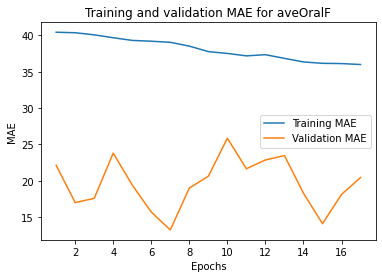

In [139]:
Forest_regg_data_random_search_DropOut = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_random_search_DropOut.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [50]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+DropOut + RandomForest features', 'NA', 20.42)

In [141]:
# Save the weights
Forest_regg_data_random_search_DropOut.save("Forest_regg_data_random_search_DropOut.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [142]:
import keras_tuner as kt
import tensorflow as tf
import random
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on all data + Dropout
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation="relu")(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout layer for regularization

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation="relu")(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression", project_name="my_rnd_search_Reg_AllFea_Dtopout", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 26s]
val_mean_absolute_error: 177.29104614257812

Best val_mean_absolute_error So Far: 6.94419002532959
Total elapsed time: 00h 04m 42s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 38.7181 - mean_absolute_error: 38.7181 - val_loss: 19.4151 - val_mean_absolute_error: 19.4151
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 36.7965 - mean_absolute_error: 36.7965 - val_loss: 20.3135 - val_mean_absolute_error: 20.3135
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 35.1722 - mean_absolute_error: 35.1722 - val_loss: 22.4517 - val_mean_absolute_error: 22.4517
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 34.5218 - mean_absolute_error: 34.5218 - val_loss: 10.9397 - val_mean_absolute_error: 10.9397
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 33.7799 - mean_absolute_error: 33.7799 - val_loss: 13.4105 - val_mean_absolute_error: 13.4105
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 33.7227 - mean_absolute_error: 33.7227 - val_loss: 23.7516 - val_mean_absolute_e

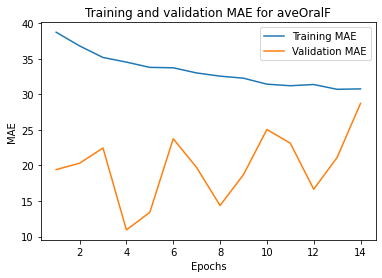

In [143]:
AllD_regg_data_random_search_DropOut = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = AllD_regg_data_random_search_DropOut.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [51]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + random_search+DropOut + All features', 'NA', 28.72)

In [145]:
# Save the weights
AllD_regg_data_random_search_DropOut.save("AllD_regg_data_random_search_DropOut.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [146]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Hyperband search on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    #Define the number of hidden layers, neurons and learning rate value    
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

hyperband_tuner = kt.Hyperband(
    build_model, objective="val_mean_absolute_error", max_epochs=100,
    factor=3, directory="regression", project_name="my_hyperband_Reg_ForestFea", seed=42)

hyperband_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                       validation_data=(x_val_RandomFD, y_val_RandomFD),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])


Trial 254 Complete [00h 01m 25s]
val_mean_absolute_error: 7.023406028747559

Best val_mean_absolute_error So Far: 2.3164222240448
Total elapsed time: 00h 46m 00s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3298 - mean_absolute_error: 2.3298 - val_loss: 2.3498 - val_mean_absolute_error: 2.3498
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3396 - mean_absolute_error: 2.3396 - val_loss: 2.3956 - val_mean_absolute_error: 2.3956
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3537 - mean_absolute_error: 2.3537 - val_loss: 2.3474 - val_mean_absolute_error: 2.3474
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3472 - mean_absolute_error: 2.3472 - val_loss: 2.3519 - val_mean_absolute_error: 2.3519
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3383 - mean_absolute_error: 2.3383 - val_loss: 2.3319 - val_mean_absolute_error: 2.3319
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3538 - mean_absolute_error: 2.3538 - val_loss: 2.3962 - val_mean_absolute_error: 2.3962
Epoch 7/10

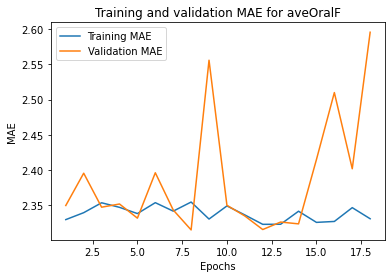

In [147]:
Forest_regg_data_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_hyper_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [52]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + hyperband_opt + RandomForest features', 'NA', 2.59)

In [149]:
# Save the weights
Forest_regg_data_hyper_search.save("Forest_regg_data_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [150]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Hyperband search on all data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

hyperband_tuner = kt.Hyperband(
    build_model, objective="val_mean_absolute_error", max_epochs=100,
    factor=3, directory="regression", project_name="my_hyperband_Reg_AllFea", seed=42)

hyperband_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                       validation_data=(x_val_AllD, y_val_AllD),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])


Trial 254 Complete [00h 01m 31s]
val_mean_absolute_error: 155.06080627441406

Best val_mean_absolute_error So Far: 1.0258705615997314
Total elapsed time: 00h 48m 56s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 1.4255 - mean_absolute_error: 1.4255 - val_loss: 1.1819 - val_mean_absolute_error: 1.1819
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 1.2002 - mean_absolute_error: 1.2002 - val_loss: 1.3719 - val_mean_absolute_error: 1.3719
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.3379 - mean_absolute_error: 1.3379 - val_loss: 2.3276 - val_mean_absolute_error: 2.3276
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2950 - mean_absolute_error: 1.2950 - val_loss: 1.2758 - val_mean_absolute_error: 1.2758
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2440 - mean_absolute_error: 1.2440 - val_loss: 1.9436 - val_mean_absolute_error: 1.9436
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2388 - mean_absolute_error: 1.2388 - val_loss: 0.9926 - val_mean_absolute_error: 0.9926
Epoch 7/10

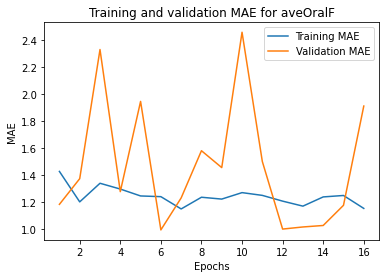

In [151]:
AllD_regg_data_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = AllD_regg_data_hyper_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [53]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + hyperband_opt + All features', 'NA', 1.90)

In [153]:
# Save the weights
AllD_regg_data_hyper_search.save("AllD_regg_data_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Bayesian optimization on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective="val_mean_absolute_error", max_trials=5,
    directory="regression", project_name="my_bayesian_opt_Reg_ForestFea", seed=42)


bayesian_opt_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])



Trial 5 Complete [00h 02m 07s]
val_mean_absolute_error: 94.3412857055664

Best val_mean_absolute_error So Far: 7.022698402404785
Total elapsed time: 00h 06m 56s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8883 - mean_absolute_error: 6.8883 - val_loss: 7.0056 - val_mean_absolute_error: 7.0056
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8712 - mean_absolute_error: 6.8712 - val_loss: 6.9948 - val_mean_absolute_error: 6.9948
Epoch 3/100
452/452 [==============================] - 1s 1ms/step - loss: 6.8543 - mean_absolute_error: 6.8543 - val_loss: 6.9704 - val_mean_absolute_error: 6.9704
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8377 - mean_absolute_error: 6.8377 - val_loss: 6.9523 - val_mean_absolute_error: 6.9523
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8208 - mean_absolute_error: 6.8208 - val_loss: 6.9378 - val_mean_absolute_error: 6.9378
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8039 - mean_absolute_error: 6.8039 - val_loss: 6.9178 - val_mean_absolute_error: 6.9178
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.2270 - mean_absolute_error: 5.2270 - val_loss: 5.3077 - val_mean_absolute_error: 5.3077
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.2112 - mean_absolute_error: 5.2112 - val_loss: 5.2898 - val_mean_absolute_error: 5.2898


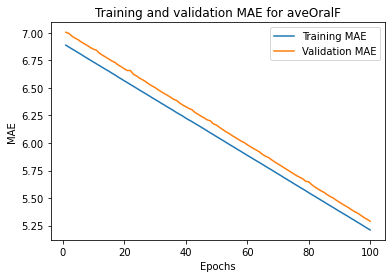

In [55]:
Forest_regg_data_bayesian_search = bayesian_opt_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Forest_regg_data_bayesian_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [56]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + bayesian_opt + RandomForest features', 'NA', 5.28)

In [57]:
# Save the weights
Forest_regg_data_bayesian_search.save("Forest_regg_data_bayesian_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Bayesian optimization on all data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    # Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective="val_mean_absolute_error", max_trials=5,
    directory="regression", project_name="my_bayesian_opt_Reg_AllFea", seed=42)


bayesian_opt_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])



Trial 5 Complete [00h 02m 11s]
val_mean_absolute_error: 91.79878997802734

Best val_mean_absolute_error So Far: 1.8533740043640137
Total elapsed time: 00h 07m 38s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 1.9041 - mean_absolute_error: 1.9041 - val_loss: 1.9293 - val_mean_absolute_error: 1.9293
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8252 - mean_absolute_error: 1.8252 - val_loss: 2.0057 - val_mean_absolute_error: 2.0057
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8423 - mean_absolute_error: 1.8423 - val_loss: 1.8998 - val_mean_absolute_error: 1.8998
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7812 - mean_absolute_error: 1.7812 - val_loss: 2.7206 - val_mean_absolute_error: 2.7206
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8503 - mean_absolute_error: 1.8503 - val_loss: 1.7670 - val_mean_absolute_error: 1.7670
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7232 - mean_absolute_error: 1.7232 - val_loss: 1.6914 - val_mean_absolute_error: 1.6914
Epoch 7/10

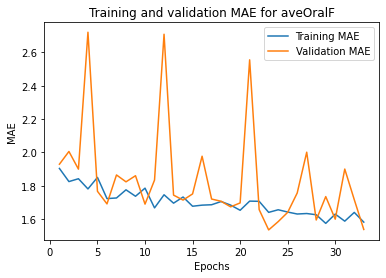

In [59]:
AllD_regg_data_bayesian_search = bayesian_opt_tuner.get_best_models(num_models=1)[0]

# Train the best mode
history = AllD_regg_data_bayesian_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [60]:
# Add results to the predefined dataset
add_model_performance(regression_performance, 'NN + bayesian_opt + All features', 'NA', 1.53)

In [61]:
# Save the weights
AllD_regg_data_bayesian_search.save("AllD_regg_data_bayesian_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Save regression results dataset
regression_performance.to_csv('regression_performance.csv', index=False)

In [63]:
# Read regression results dataset
regression_performance = pd.read_csv('regression_performance.csv')

In [64]:
#Sort the dataset by lowest MAE
sorted_df_regression = regression_performance.sort_values(by='MAE')
sorted_df_regression.head(6)

,Model,RMSE,MAE
7,Random Forest + All features,1.81,0.34
16,XGB + All features,1.48,0.55
37,NN + random_search+L2 + All features,NaN,1.32
43,NN + bayesian_opt + All features,NaN,1.53
33,NN + random_search (No regularizer) + All feat...,NaN,1.53
13,KNN + All features,3.59,1.71


In [70]:
# Define the test set
x_test_AllD = scaled_alldata_test
y_test_AllD = label_test

# Our best model prediction on test set
y_test_predict = RandomForestRegg_best_estimator_AllD.predict(x_test_AllD)

# RMSE and MAE scores on test set
test_rmse = np.sqrt(mean_squared_error(y_test_AllD, y_test_predict))
test_mae = mean_absolute_error(y_test_AllD, y_test_predict)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Test RMSE: 2.1833385670380125
Test MAE: 0.33603501773049615


In [72]:
# classification

In [71]:
Classification_dataset = Full_dataset3.copy()

# Change our labels to binary (2 classes) due to high imbalances
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('low', 'medium')
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('medium', 'acceptable')
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('high', 'unacceptable')


In [73]:
# Occurrence of each class after changing to binary
Classification_dataset['CO2 Emission Class'].value_counts()

CO2 Emission Class
acceptable      13269
unacceptable     9287
Name: count, dtype: int64

In [74]:
import pandas as pd
import random

#identify the indices of the 'acceptable' class
acceptable_indices = Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'acceptable'].index

# Randomly select a subset from the 'acceptable' class
random_acceptable_indices = random.sample(list(acceptable_indices), len(Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'unacceptable']))

# Concatenate selected subset of 'acceptable' data to all 'unacceptable' data
balanced_indices = random_acceptable_indices + list(Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'unacceptable'].index)
balanced_data = Classification_dataset.loc[balanced_indices]


balanced_data['CO2 Emission Class'].value_counts()


CO2 Emission Class
acceptable      9287
unacceptable    9287
Name: count, dtype: int64

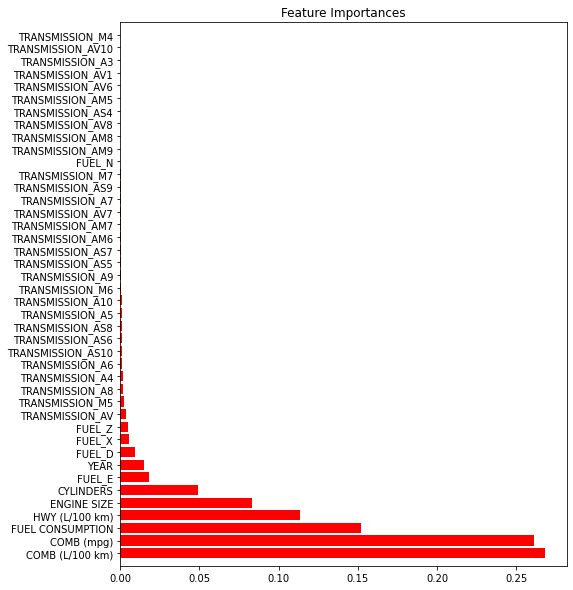

In [75]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Select numeric columns
numeric_data2 = Classification_dataset.select_dtypes(include=['number'])

# Define features and labels
X = numeric_data2.drop(['EMISSIONS', 'CO2 Emission Class_high', 'CO2 Emission Class_low',
                       'CO2 Emission Class_medium', 'Unnamed: 0'], axis=1)
y = numeric_data2[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]


# Train a RandomForestClassifier
rfC = RandomForestClassifier()
rfC.fit(X, y)

# Plot feature importances
importances = rfC.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  
plt.yticks(range(X.shape[1]), X.columns[indices]) 
plt.ylim([-1, X.shape[1]])  #y-axis limit
plt.show()


In [76]:
from sklearn.preprocessing import LabelEncoder

# selected features
RandomFClassifier_data = balanced_data[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)"]]

#LabelEncoder
label_encoder = LabelEncoder()

#labels
emission_cat = balanced_data[["CO2 Emission Class"]]

label_encoded = label_encoder.fit_transform(emission_cat.squeeze())

# Get the categories after encoding
categories = label_encoder.classes_

# Print the categories and their corresponding indices
for i, label in enumerate(categories):
    print(f"Index {i}: {label}")


Index 0: acceptable
Index 1: unacceptable


In [77]:
#scale input data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_RandomFClass = scaler.fit_transform(RandomFClassifier_data)

In [78]:
#split data into train and test set + stratify
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_RandomFClass,
                                                label_encoded, stratify=label_encoded, test_size=0.2, random_state=10)


In [79]:
#split train set into train and validation set + stratify
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train,
                                                y_train, stratify=y_train, test_size=0.2, random_state=10)

In [80]:
# Empty dataset to store classification model results
classification_performance_df = pd.DataFrame(columns=['Model', 'F1'])

In [81]:
# Define a function to manually add model performance
def add_model_performance_classification(df, model_name, f1):
    df_length = len(df)
    df.loc[df_length] = [model_name, f1]


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# RandomForestClassifier on random forest-selected features
param_grid = [
    {'n_estimators': [10, 20, 30],    #Number of estimators
     'max_features': [2, 4, 6, 8],  # Restricting the number of features
     'max_depth': [2, 3],   # Maximum depth of a tree
     'min_samples_split' : [3, 4, 5, 6],    # Minimum number of samples required to split an internal node
     'min_samples_leaf' : [3, 4, 5, 6]     #Minimum number of samples required to be at a leaf node
    }
]

forest_class = RandomForestClassifier(random_state=10)

grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest.fit(x_train_1, y_train_1)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(RandomForestClass_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
confusion_matrix = confusion_matrix(y_val_1, y_val_pred)
print("confusion matrix:")
print(confusion_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1486
           1       0.96      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

confusion matrix:
[[1426   60]
 [  29 1457]]


In [83]:
from sklearn.metrics import PrecisionRecallDisplay

#Define Precision-Recall curve function
def PrecisionRecall_validation (classifier, classifier_name ,x_val, y_val):
    display = PrecisionRecallDisplay.from_estimator(
        classifier, x_val, y_val, name= classifier_name, plot_chance_level=True)
    _ = display.ax_.set_title("Precision-Recall curve")

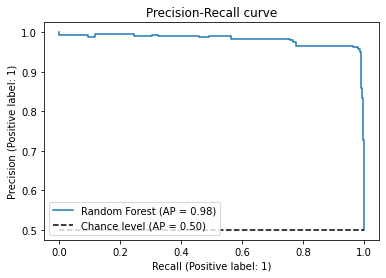

In [84]:
# Precision-Recall curve
PrecisionRecall_validation (RandomForestClass_best_estimator, 'Random Forest' ,x_val_1, y_val_1)

In [85]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to find the Best Threshold by F1 score for models support "predict_proba"
def f1_max(classifier, x_train, y_train, x_val, y_val):
    # cross_val_predict with "predict_proba"
    y_scores_1 = cross_val_predict(classifier, x_train, y_train, cv=5, method="predict_proba", n_jobs=-1)

    precisions_1, recalls_1, thresholds_1 = precision_recall_curve(y_train_1, y_scores_1[:, 1])
    
    # Define a small value (eps) to avoid zero division
    eps = 0.00001
    f1_1 = 2/(1/(precisions_1 + eps)+ 1/(recalls_1 + eps))
    ind = np.argmax(f1_1)

    y_val_scores_1 = classifier.predict_proba(x_val)[:, 1]

    # apply the threshold
    y_val_pred_thresholded_1 = (y_val_scores_1 >= thresholds_1[ind] )

    precision = precision_score(y_val, y_val_pred_thresholded_1)
    recall = recall_score(y_val, y_val_pred_thresholded_1)
    f1 = f1_score(y_val, y_val_pred_thresholded_1)

    print(f'Metrics with {thresholds_1[ind]:.2f} threshold:')
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

In [86]:
# Best Threshold by F1 score
f1_max(RandomForestClass_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.28 threshold:
Recall: 0.9865410497981157
Precision: 0.9562948467058056
F1 Score: 0.9711825107651539


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Define a function to find the Best Threshold by Roc curve for models support "predict_proba"
def roc_curve_max(classifier, x_train, y_train, x_val, y_val):
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="predict_proba", n_jobs=-1)
    fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])
    
    # Find the closest point on our curve to the top left corner
    dist = np.sqrt((0-fpr)**2 + (1-tpr)**2)
    ind = np.argmin(dist)
    fpr[ind], tpr[ind], thresholds[ind] 

    # Get the raw prediction scores for validation data
    y_val_scores_1 = classifier.predict_proba(x_val)[:, 1]

    # Apply the threshold to get binary predictions for validation data
    y_val_pred_thresholded_1 = (y_val_scores_1 >= thresholds[ind] )

    precision = precision_score(y_val, y_val_pred_thresholded_1)
    recall = recall_score(y_val, y_val_pred_thresholded_1)
    f1 = f1_score(y_val, y_val_pred_thresholded_1)

    print(f'Metrics with {thresholds[ind]:.2f} threshold:')
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

In [88]:
# Best Threshold by Roc curve
roc_curve_max(RandomForestClass_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.50 threshold:
Recall: 0.9811574697173621
Precision: 0.9630118890356671
F1 Score: 0.9720000000000001


In [89]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "Random Forest", 0.9720)

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve plotting function for models support "predict_proba"
def precision_recall_threshold(classifier, x_train, y_train, first_threshold, second_threshold):
    # cross_val_predict with "predict_proba"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="predict_proba", n_jobs=-1)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.grid(True)
    
    plt.axvline(x= first_threshold , color='r', linestyle=':')    
    plt.axvline(x= second_threshold, color='m', linestyle=':')   
    
    plt.text(first_threshold, 0.5, 'F1 Threshold', color='r', rotation=90)
    plt.text(second_threshold, 0.5, 'ROC curve Threshold', color='m', rotation=90)

    plt.show()

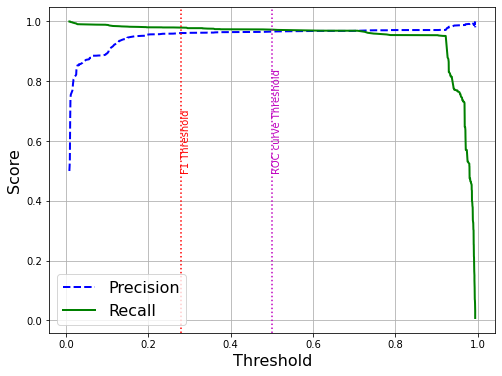

In [91]:
# Precision-Recall curve
precision_recall_threshold(RandomForestClass_best_estimator, x_train_1, y_train_1, 0.28, 0.50)

In [94]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Roc Curve plotting function for models support "predict_proba"
def plot_roc_curve(classifier, x_train, y_train):
    # cross_val_predict with "predict_proba"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="predict_proba", n_jobs=-1)
    # Compute false positive and true positive
    fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])
    # Find threshold for 90% recall
    recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
    # Find threshold for 90% precision
    fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

    plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
    plt.plot([fpr_90], [recall_90_precision], "ro")

    # x-axis and y-axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.show()

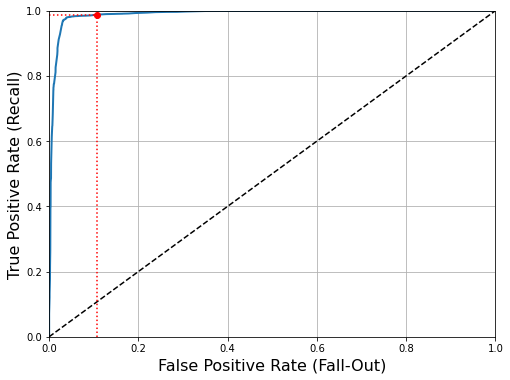

In [95]:
# Roc Curve
plot_roc_curve(RandomForestClass_best_estimator, x_train_1, y_train_1)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# DecisionTreeClassifier on random forest-selected features
# Define the parameter grid
param_grid_tree = {
    'max_depth': range(2, 6),   # Maximum depth of a tree
    'min_samples_split': range(2, 11),   # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 5)   #Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Perform grid search
grid_search_tree = GridSearchCV(tree_classifier, param_grid_tree, cv=10, n_jobs=-1, scoring='f1_weighted',
                                return_train_score=True)

grid_search_tree.fit(x_train_1, y_train_1)

decision_tree_best_estimator = grid_search_tree.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(decision_tree_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1486
           1       0.96      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1422   64]
 [  32 1454]]


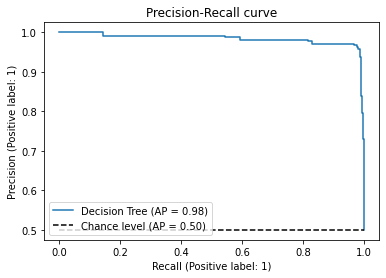

In [97]:
# Precision-Recall curve
PrecisionRecall_validation (decision_tree_best_estimator, 'Decision Tree' ,x_val_1, y_val_1)

In [98]:
# Best Threshold by F1 score
f1_max(decision_tree_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.49 threshold:
Recall: 0.9865410497981157
Precision: 0.9581699346405229
F1 Score: 0.9721485411140584


In [99]:
# Best Threshold by Roc curve
roc_curve_max(decision_tree_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.49 threshold:
Recall: 0.9865410497981157
Precision: 0.9581699346405229
F1 Score: 0.9721485411140584


In [100]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'Decision Tree', 0.9721)

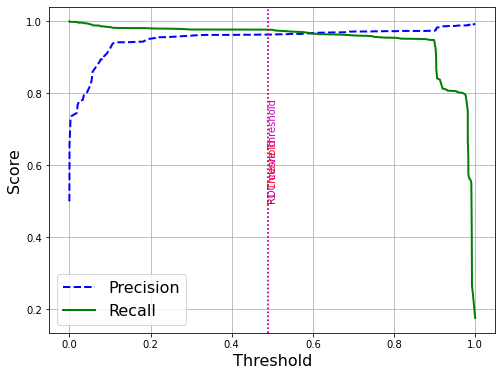

In [101]:
# Precision and Recall by Threshold
precision_recall_threshold(decision_tree_best_estimator, x_train_1, y_train_1, 0.49, 0.49)

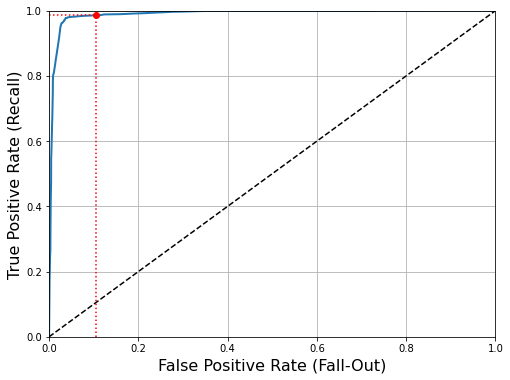

In [102]:
# Roc Curve
plot_roc_curve(decision_tree_best_estimator, x_train_1, y_train_1)

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}   # Number of neighbours
]

knn_classifier = KNeighborsClassifier()

# Grid search
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'f1_weighted', return_train_score=True)

grid_search_knn.fit(x_train_1, y_train_1)

knn_best_estimator = grid_search_knn.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(knn_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1486
           1       0.96      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1423   63]
 [  29 1457]]


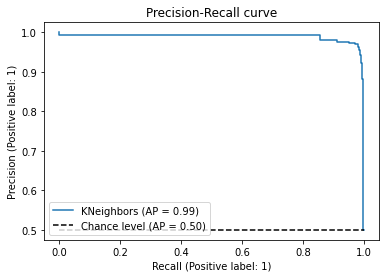

In [104]:
# Precision-Recall curve
PrecisionRecall_validation (knn_best_estimator, 'KNeighbors' ,x_val_1, y_val_1)

In [105]:
# Best Threshold by F1 score
f1_max(knn_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.50 threshold:
Recall: 0.9851951547779273
Precision: 0.9625246548323472
F1 Score: 0.9737279680744928


In [106]:
# Best Threshold by Roc curve
roc_curve_max(knn_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.60 threshold:
Recall: 0.9798115746971736
Precision: 0.971314209472982
F1 Score: 0.9755443886097152


In [107]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'KNeighbors', 0.9755)

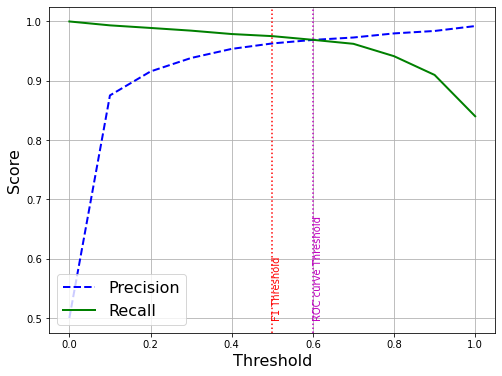

In [108]:
# Precision and Recall by Threshold
precision_recall_threshold(knn_best_estimator, x_train_1, y_train_1, 0.50, 0.60)

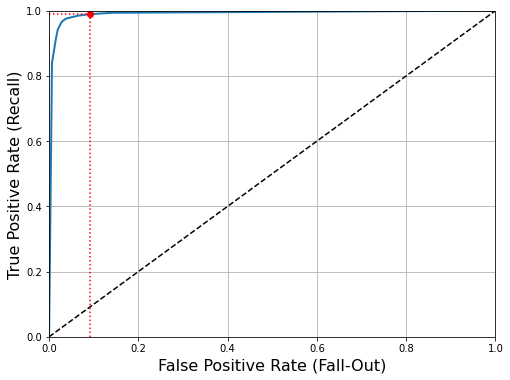

In [109]:
# Roc Curve
plot_roc_curve(knn_best_estimator, x_train_1, y_train_1)

In [110]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# xgboost (classifcation) on random forest-selected features
#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           #Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBClassifier(random_state=10)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
rnd_search_xgb.fit(x_train_1, y_train_1)

xgb_best_estimator = rnd_search_xgb.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(xgb_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1486
           1       0.96      0.99      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1429   57]
 [  21 1465]]


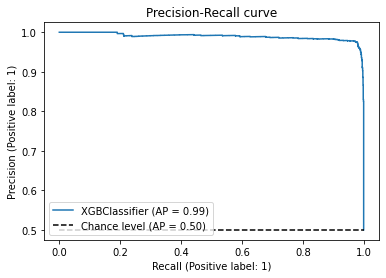

In [111]:
# Precision-Recall curve
PrecisionRecall_validation (xgb_best_estimator, 'XGBClassifier' ,x_val_1, y_val_1)

In [112]:
# Best Threshold by F1 score
f1_max(xgb_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.49 threshold:
Recall: 0.9825033647375505
Precision: 0.9636963696369637
F1 Score: 0.9730089970009997


In [113]:
# Best Threshold by Roc curve
roc_curve_max(xgb_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.51 threshold:
Recall: 0.9825033647375505
Precision: 0.9656084656084656
F1 Score: 0.9739826551034023


In [114]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'XGBClassifier', 0.9739)

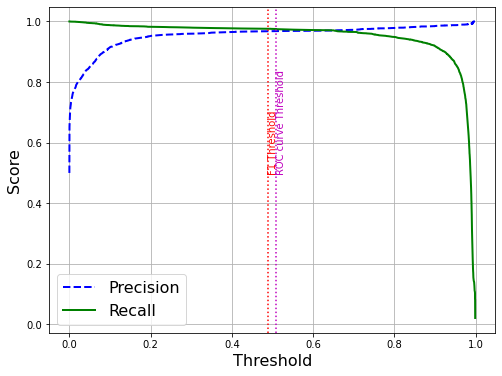

In [115]:
# Precision and Recall by Threshold
precision_recall_threshold(xgb_best_estimator, x_train_1, y_train_1, 0.49, 0.51)

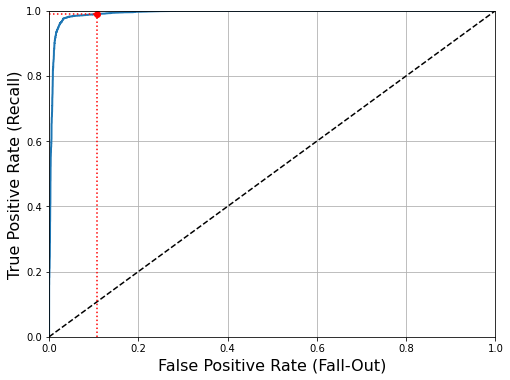

In [116]:
# Roc Curve
plot_roc_curve(xgb_best_estimator, x_train_1, y_train_1)

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
 
# RidgeClassifier on random forest-selected features
param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2),      # Range of alpha values
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']    #Solvers
}


ridge_class = RidgeClassifier(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_class, param_grid, cv=5, n_jobs=-1, 
                           scoring='f1_weighted', return_train_score=True)

grid_search_ridge.fit(x_train_1, y_train_1)

ridge_best_estimator = grid_search_ridge.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(ridge_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1486
           1       0.96      0.91      0.93      1486

    accuracy                           0.94      2972
   macro avg       0.94      0.94      0.94      2972
weighted avg       0.94      0.94      0.94      2972

Confusion matrix:
[[1429   57]
 [ 132 1354]]


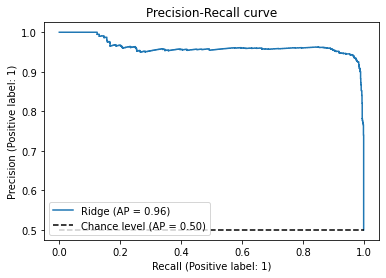

In [118]:
# Precision-Recall curve
PrecisionRecall_validation (ridge_best_estimator, 'Ridge' ,x_val_1, y_val_1)

In [119]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Define a function to find the Best Threshold by F1 score for models support "decision_function"
def f1_max_models_with_decision_func(classifier, x_train, y_train, x_val, y_val):
    # cross_val_predict with "decision_function"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="decision_function", n_jobs=-1)

    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    
    # Define a small value (eps) to avoid zero division
    eps = 0.00001
    f1 = 2 / (1 / (precisions + eps) + 1 / (recalls + eps))
    ind = np.argmax(f1)

    # Threshold maximizes F1 score
    best_threshold = thresholds[ind]

    # apply the threshold
    y_val_scores = classifier.decision_function(x_val)
    y_val_pred_thresholded = (y_val_scores >= best_threshold)

    precision = precision_score(y_val, y_val_pred_thresholded)
    recall = recall_score(y_val, y_val_pred_thresholded)
    f1 = f1_score(y_val, y_val_pred_thresholded)

    print(f'Metrics with {best_threshold:.2f} threshold:')
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

In [120]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(ridge_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.05 threshold:
Recall: 0.9609690444145357
Precision: 0.9431968295904888
F1 Score: 0.952


In [121]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Define a function to find the Best Threshold by Roc curve for models support "decision_function"
def roc_curve_max_models_with_decision_func(classifier, x_train, y_train, x_val, y_val):
    # cross_val_predict with "decision_function"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="decision_function", n_jobs=-1)
    
    # Compute false positive and true positive
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    
    # Find the closest point on our curve to the top left corner
    dist = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
    ind = np.argmin(dist)
    best_threshold = thresholds[ind]

    y_val_scores = classifier.decision_function(x_val)

    # Apply the threshold
    y_val_pred_thresholded = (y_val_scores >= best_threshold)

    precision = precision_score(y_val, y_val_pred_thresholded)
    recall = recall_score(y_val, y_val_pred_thresholded)
    f1 = f1_score(y_val, y_val_pred_thresholded)

    print(f'Metrics with {best_threshold:.2f} threshold:')
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

In [122]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(ridge_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.05 threshold:
Recall: 0.9609690444145357
Precision: 0.9431968295904888
F1 Score: 0.952


In [123]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'Ridge', 0.952)

In [124]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve plotting function for models support "decision_function"
def precision_recall_threshold_models_with_decision_func(classifier, x_train, y_train, first_threshold, second_threshold):
    # cross_val_predict with "decision_function"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="decision_function", n_jobs=-1)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.grid(True)
    
    plt.axvline(x= first_threshold , color='r', linestyle=':')    
    plt.axvline(x= second_threshold, color='m', linestyle=':')    
    
    plt.text(first_threshold, 0.5, 'F1 Threshold', color='r', rotation=90)
    plt.text(second_threshold, 0.5, 'ROC curve Threshold', color='m', rotation=90)

    plt.show()

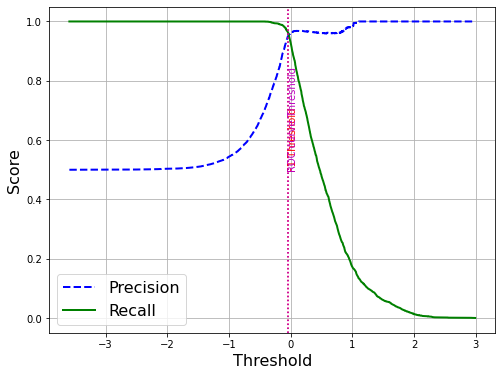

In [125]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(ridge_best_estimator, x_train_1, y_train_1, -0.05, -0.05)

In [126]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Roc Curve plotting function for models support "decision_function"
def plot_roc_curve_models_with_decision_func(classifier, x_train, y_train):
    # cross_val_predict with "decision_function"
    y_scores = cross_val_predict(classifier, x_train, y_train, cv=5, method="decision_function", n_jobs=-1)
    
    # Convert class probabilities to class labels
    y_train_labels = (y_train == 1).astype(int)  
    
    # Compute false positive and true positive
    fpr, tpr, thresholds = roc_curve(y_train_labels, y_scores)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train_labels, y_scores)
    # Find threshold for 90% recall
    recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
    # Find threshold for 90% precision
    fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

    # Plotting
    plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
    plt.plot([fpr_90], [recall_90_precision], "ro")

    # x-axis and y-axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.show()

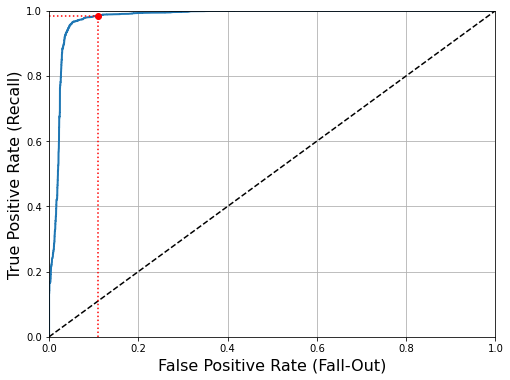

In [127]:
# Roc Curve
plot_roc_curve_models_with_decision_func(ridge_best_estimator, x_train_1, y_train_1)

In [128]:
# no lasso and elastic net classifier

In [129]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#SGD (no penatly) on random forest-selected features

# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDClassifier(random_state=10 , max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=5, scoring='f1_weighted', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_1, y_train_1)

SGD_best_estimator = SGD_grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(SGD_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1486
           1       0.95      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1412   74]
 [  28 1458]]


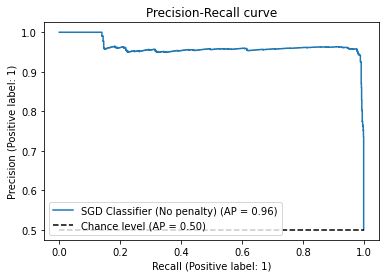

In [130]:
# Precision-Recall curve
PrecisionRecall_validation (SGD_best_estimator, 'SGD Classifier (No penalty)' ,x_val_1, y_val_1)

In [131]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(SGD_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.04 threshold:
Recall: 0.9764468371467026
Precision: 0.9577557755775578
F1 Score: 0.9670109963345552


In [132]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(SGD_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.04 threshold:
Recall: 0.9764468371467026
Precision: 0.9577557755775578
F1 Score: 0.9670109963345552


In [133]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'SGD Classifier (No penalty)', 0.9670)

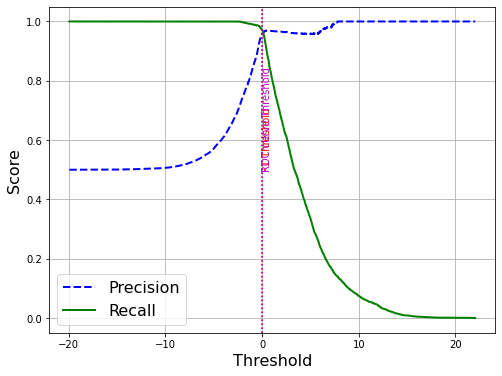

In [134]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(SGD_best_estimator, x_train_1, y_train_1, 0.04, 0.04)

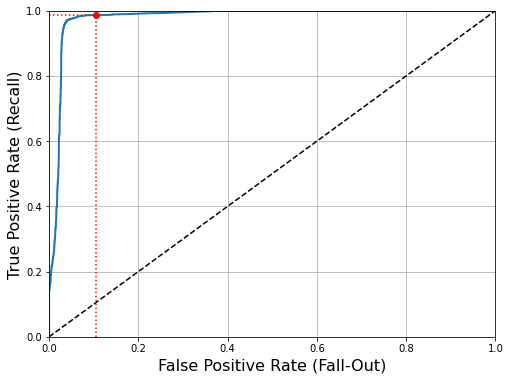

In [135]:
# Roc Curve
plot_roc_curve_models_with_decision_func(SGD_best_estimator, x_train_1, y_train_1)

In [136]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#SGD + L1 on random forest-selected features

# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}


SGD_class_l1 = SGDClassifier(random_state=10 , max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty="l1",
                             early_stopping=True, n_iter_no_change=20)

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD_class_l1, param_grid_sgd_l1, cv=5, scoring='f1_weighted', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_1, y_train_1)

SGD_l1_best_estimator = SGD_grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(SGD_l1_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1486
           1       0.96      0.97      0.96      1486

    accuracy                           0.96      2972
   macro avg       0.96      0.96      0.96      2972
weighted avg       0.96      0.96      0.96      2972

Confusion matrix:
[[1423   63]
 [  47 1439]]


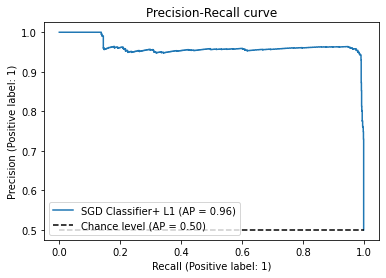

In [137]:
# Precision-Recall curve
PrecisionRecall_validation (SGD_l1_best_estimator, 'SGD Classifier+ L1' ,x_val_1, y_val_1)

In [138]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(SGD_l1_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.04 threshold:
Recall: 0.9751009421265141
Precision: 0.9576999339061467
F1 Score: 0.966322107369123


In [139]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(SGD_l1_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.04 threshold:
Recall: 0.9751009421265141
Precision: 0.9576999339061467
F1 Score: 0.966322107369123


In [140]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'SGD Classifier+ L1', 0.9663)

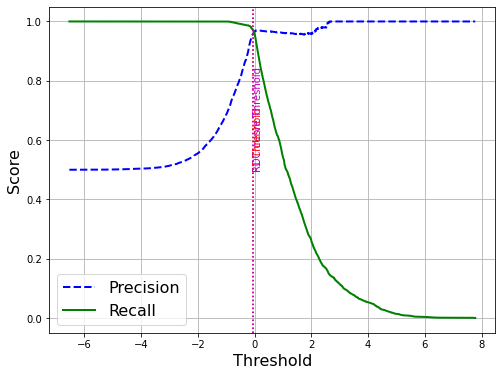

In [141]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(SGD_l1_best_estimator, x_train_1, y_train_1, -0.04, -0.04)

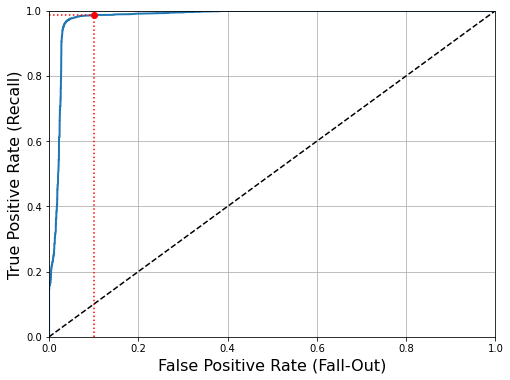

In [142]:
# Roc Curve
plot_roc_curve_models_with_decision_func(SGD_l1_best_estimator, x_train_1, y_train_1)

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#SGD + L2 on random forest-selected features

# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}


SGD_class_l2 = SGDClassifier(random_state=10 , max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty="l2",
                             early_stopping=True, n_iter_no_change=20)

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD_class_l2, param_grid_sgd_l2, cv=5, scoring='f1_weighted', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_1, y_train_1)

SGD_l2_best_estimator = SGD_grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(SGD_l2_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1486
           1       0.95      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1415   71]
 [  32 1454]]


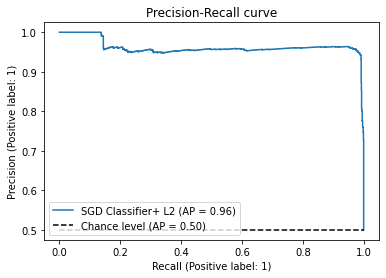

In [144]:
# Precision-Recall curve
PrecisionRecall_validation (SGD_l2_best_estimator, 'SGD Classifier+ L2' ,x_val_1, y_val_1)

In [145]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(SGD_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.01 threshold:
Recall: 0.971736204576043
Precision: 0.9581950895819509
F1 Score: 0.9649181423321084


In [146]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(SGD_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.01 threshold:
Recall: 0.971736204576043
Precision: 0.9581950895819509
F1 Score: 0.9649181423321084


In [147]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'SGD Classifier+ L2', 0.9649)

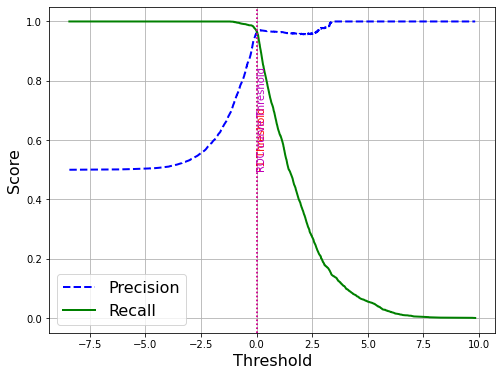

In [148]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(SGD_l2_best_estimator, x_train_1, y_train_1, 0.01, 0.01)

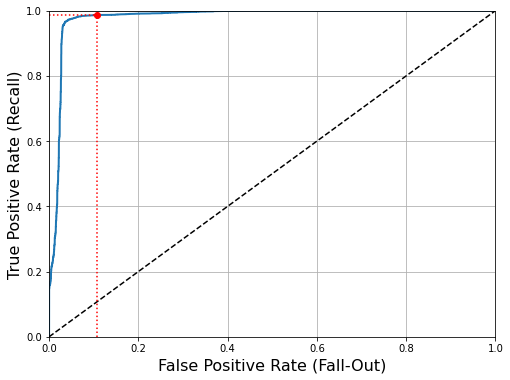

In [149]:
# Roc Curve
plot_roc_curve_models_with_decision_func(SGD_l2_best_estimator, x_train_1, y_train_1)

In [150]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#SGD + L1L2 on random forest-selected features

# hyperparameters to search
param_grid_sgd_l1l2  = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' : np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}


SGD_class_l1l2 = SGDClassifier(random_state=10 , max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty="elasticnet",
                             early_stopping=True, n_iter_no_change=20)

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD_class_l1l2, param_grid_sgd_l1l2, cv=5, scoring='f1_weighted', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_1, y_train_1)

SGD_l1l2_best_estimator = SGD_grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(SGD_l1l2_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1486
           1       0.96      0.98      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1418   68]
 [  32 1454]]


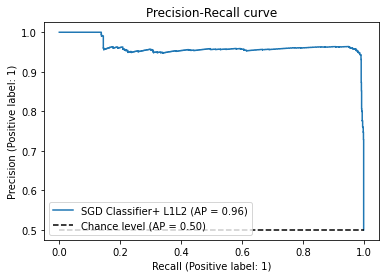

In [151]:
# Precision-Recall curve
PrecisionRecall_validation (SGD_l1l2_best_estimator, 'SGD Classifier+ L1L2' ,x_val_1, y_val_1)

In [152]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(SGD_l1l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.00 threshold:
Recall: 0.9791386271870794
Precision: 0.9522251308900523
F1 Score: 0.9654943596549436


In [153]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(SGD_l1l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with 0.00 threshold:
Recall: 0.9791386271870794
Precision: 0.9522251308900523
F1 Score: 0.9654943596549436


In [154]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'SGD Classifier+ L1L2', 0.9654)

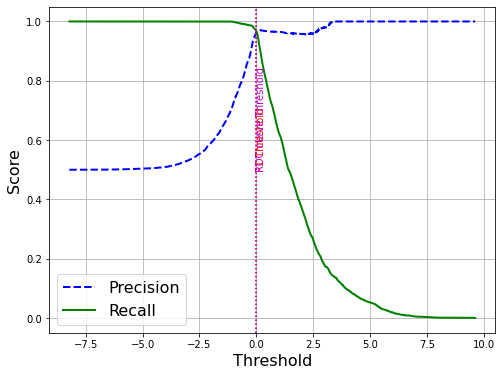

In [155]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(SGD_l1l2_best_estimator, x_train_1, y_train_1, 0.00, 0.00)

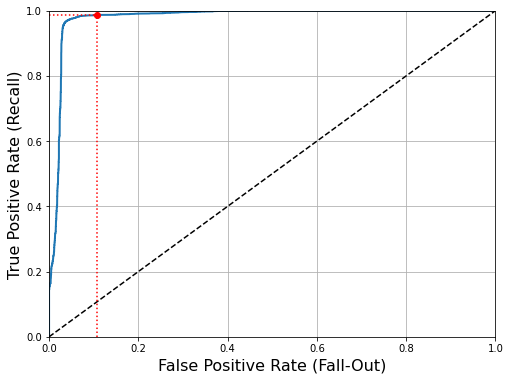

In [156]:
# Roc Curve
plot_roc_curve_models_with_decision_func(SGD_l1l2_best_estimator, x_train_1, y_train_1)

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# LogisticRegression + L2 on random forest-selected features
# Solvers only support L2
logistic = LogisticRegression(max_iter=1000)

# hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Penalty type
    'solver': ['lbfgs', 'newton-cg', 'sag']
}

# grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(x_train_1, y_train_1)

# Get the best hyperparameters
logisticR_l2_best_estimator = grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(logisticR_l2_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1486
           1       0.96      0.97      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972

Confusion matrix:
[[1423   63]
 [  41 1445]]


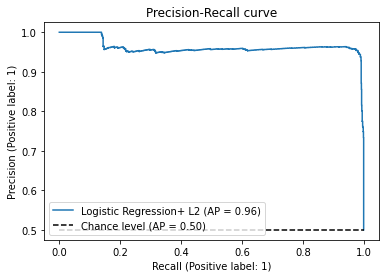

In [158]:
# Precision-Recall curve
PrecisionRecall_validation (logisticR_l2_best_estimator, 'Logistic Regression+ L2' ,x_val_1, y_val_1)

In [159]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(logisticR_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.12 threshold:
Recall: 0.9804845222072678
Precision: 0.9529103989535644
F1 Score: 0.9665008291873963


In [160]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(logisticR_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.05 threshold:
Recall: 0.9744279946164199
Precision: 0.9576719576719577
F1 Score: 0.9659773182121415


In [161]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'Logistic Regression+ L2', 0.9665)

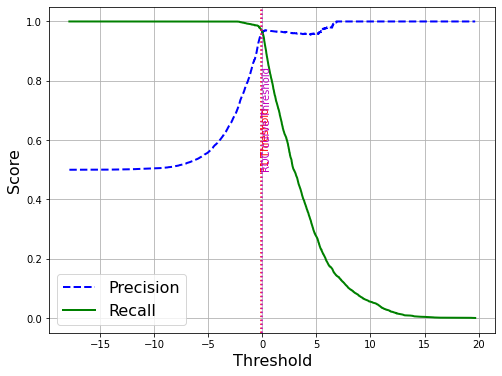

In [162]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(logisticR_l2_best_estimator, x_train_1, y_train_1, -0.12, -0.05)

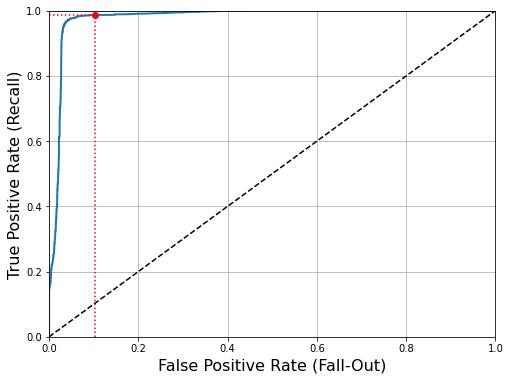

In [163]:
# Roc Curve
plot_roc_curve_models_with_decision_func(logisticR_l2_best_estimator, x_train_1, y_train_1)

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# LogisticRegression + L1 or L2 on random forest-selected features
# solver support L1 & L2
logistic = LogisticRegression(max_iter=1000, solver="liblinear")

# hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1']  # Penalty type
}

# grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(x_train_1, y_train_1)

# Get the best hyperparameters
logisticR_l1_and_l2_best_estimator = grid_search.best_estimator_

# Predict labels for validation set
y_val_pred = cross_val_predict(logisticR_l1_and_l2_best_estimator, x_val_1, y_val_1, cv=5, n_jobs=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_val_1, y_val_pred)
print("Confusion matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1486
           1       0.96      0.97      0.96      1486

    accuracy                           0.96      2972
   macro avg       0.96      0.96      0.96      2972
weighted avg       0.96      0.96      0.96      2972

Confusion matrix:
[[1425   61]
 [  50 1436]]


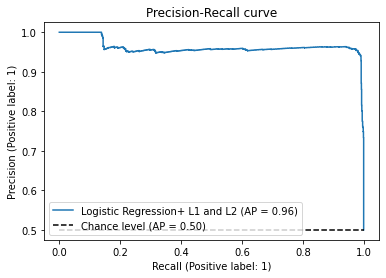

In [165]:
# Precision-Recall curve
PrecisionRecall_validation (logisticR_l1_and_l2_best_estimator, 'Logistic Regression+ L1 and L2' ,x_val_1, y_val_1)

In [166]:
# Best Threshold by F1 score
f1_max_models_with_decision_func(logisticR_l1_and_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.11 threshold:
Recall: 0.9784656796769852
Precision: 0.9540682414698163
F1 Score: 0.9661129568106313


In [167]:
# Best Threshold by Roc curve
roc_curve_max_models_with_decision_func(logisticR_l1_and_l2_best_estimator, x_train_1, y_train_1, x_val_1, y_val_1)

Metrics with -0.07 threshold:
Recall: 0.9744279946164199
Precision: 0.9576719576719577
F1 Score: 0.9659773182121415


In [168]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, 'Logistic Regression+ L1 and L2', 0.9661)

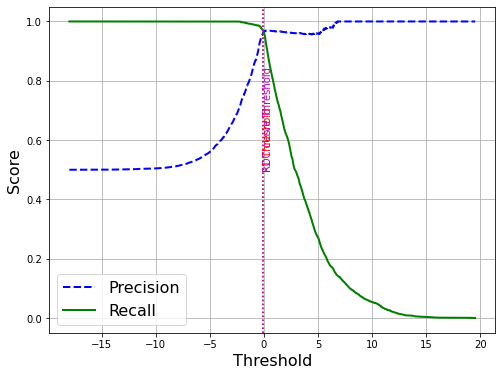

In [169]:
# Precision and Recall by Threshold
precision_recall_threshold_models_with_decision_func(logisticR_l1_and_l2_best_estimator, x_train_1, y_train_1,-0.11, -0.07)

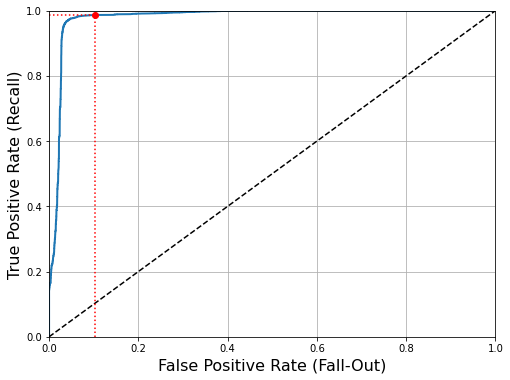

In [170]:
# Roc Curve
plot_roc_curve_models_with_decision_func(logisticR_l1_and_l2_best_estimator, x_train_1, y_train_1)

In [171]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers

In [172]:
# Check the input shape and label
print("input shape:", x_train_1.shape)
print("label shape:", y_train_1.shape)

input shape: (11887, 4)
label shape: (11887,)


In [173]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification", project_name="my_rnd_search_classification"
)

random_search_tuner.search(x_train_1, y_train_1, epochs=100,
                           validation_data=(x_val_1, y_val_1),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 09s]
val_f1_m: 0.9679543375968933

Best val_f1_m So Far: 0.9708666801452637
Total elapsed time: 00h 01m 26s


Epoch 1/100
372/372 [==============================] - 3s 3ms/step - loss: 0.1071 - accuracy: 0.9693 - f1_m: 0.9681 - val_loss: 0.1057 - val_accuracy: 0.9714 - val_f1_m: 0.9708
Epoch 2/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.9687 - f1_m: 0.9679 - val_loss: 0.1082 - val_accuracy: 0.9707 - val_f1_m: 0.9702
Epoch 3/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9685 - f1_m: 0.9674 - val_loss: 0.1034 - val_accuracy: 0.9711 - val_f1_m: 0.9706
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9689 - f1_m: 0.9685 - val_loss: 0.1053 - val_accuracy: 0.9684 - val_f1_m: 0.9680
Epoch 5/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9685 - f1_m: 0.9675 - val_loss: 0.1107 - val_accuracy: 0.9680 - val_f1_m: 0.9676
Epoch 6/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9690 - f1_m: 0.9654

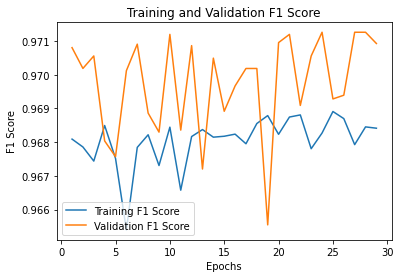

In [174]:
Classification_random_search = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_random_search.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [175]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+RandomSearch", 0.9709)

In [176]:
# Save the weights
Classification_random_search.save("Classification_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [177]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + L1 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification", project_name="my_rnd_search_classification_l1"
)

random_search_tuner.search(x_train_1, y_train_1, epochs=100,
                           validation_data=(x_val_1, y_val_1),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 10s]
val_f1_m: 0.9659147262573242

Best val_f1_m So Far: 0.9679257869720459
Total elapsed time: 00h 01m 41s


Epoch 1/100
372/372 [==============================] - 4s 4ms/step - loss: 0.1909 - accuracy: 0.9658 - f1_m: 0.9647 - val_loss: 0.1880 - val_accuracy: 0.9664 - val_f1_m: 0.9661
Epoch 2/100
372/372 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9659 - f1_m: 0.9652 - val_loss: 0.1850 - val_accuracy: 0.9680 - val_f1_m: 0.9679
Epoch 3/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1870 - accuracy: 0.9660 - f1_m: 0.9652 - val_loss: 0.1846 - val_accuracy: 0.9664 - val_f1_m: 0.9656
Epoch 4/100
372/372 [==============================] - 1s 4ms/step - loss: 0.1853 - accuracy: 0.9658 - f1_m: 0.9655 - val_loss: 0.1821 - val_accuracy: 0.9664 - val_f1_m: 0.9656
Epoch 5/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1842 - accuracy: 0.9663 - f1_m: 0.9654 - val_loss: 0.1790 - val_accuracy: 0.9657 - val_f1_m: 0.9650
Epoch 6/100
372/372 [==============================] - 1s 4ms/step - loss: 0.1820 - accuracy: 0.9657 - f1_m: 0.9639

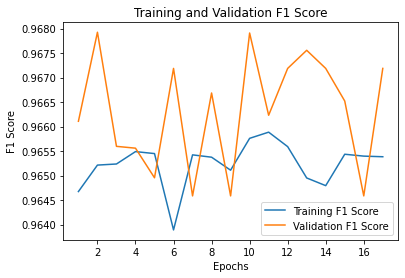

In [178]:
Classification_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_random_search_l1.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [179]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L1 ", 0.9672)

In [180]:
# Save the weights
Classification_random_search_l1.save("Classification_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [181]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + L2 regularization
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification", project_name="my_rnd_search_classification_l2"
)

random_search_tuner.search(x_train_1, y_train_1, epochs=100,
                           validation_data=(x_val_1, y_val_1),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 10s]
val_f1_m: 0.9657931327819824

Best val_f1_m So Far: 0.9676483273506165
Total elapsed time: 00h 01m 36s


Epoch 1/100
372/372 [==============================] - 3s 3ms/step - loss: 0.1776 - accuracy: 0.9643 - f1_m: 0.9632 - val_loss: 0.1744 - val_accuracy: 0.9664 - val_f1_m: 0.9661
Epoch 2/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1756 - accuracy: 0.9636 - f1_m: 0.9628 - val_loss: 0.1738 - val_accuracy: 0.9660 - val_f1_m: 0.9651
Epoch 3/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9642 - f1_m: 0.9633 - val_loss: 0.1752 - val_accuracy: 0.9660 - val_f1_m: 0.9651
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1746 - accuracy: 0.9633 - f1_m: 0.9629 - val_loss: 0.1701 - val_accuracy: 0.9650 - val_f1_m: 0.9643
Epoch 5/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9633 - f1_m: 0.9626 - val_loss: 0.1736 - val_accuracy: 0.9660 - val_f1_m: 0.9651
Epoch 6/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1746 - accuracy: 0.9626 - f1_m: 0.9608

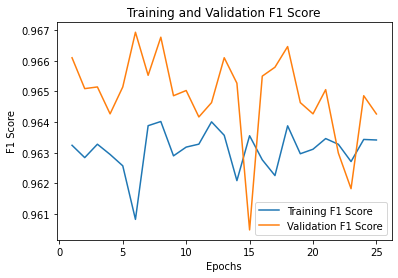

In [182]:
Classification_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_random_search_l2.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [183]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L2 ", 0.9643)

In [184]:
# Save the weights
Classification_random_search_l2.save("Classification_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [185]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Random search on random forest-selected data + Dropout
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
    # Output layer
    outputs = tf.keras.layers.Dense(1, activation= 'sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification", project_name="my_rnd_search_classification_dropout"
)

random_search_tuner.search(x_train_1, y_train_1, epochs=100,
                           validation_data=(x_val_1, y_val_1),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 10s]
val_f1_m: 0.9655541777610779

Best val_f1_m So Far: 0.9701501131057739
Total elapsed time: 00h 01m 44s


Epoch 1/100
372/372 [==============================] - 3s 3ms/step - loss: 0.1154 - accuracy: 0.9683 - f1_m: 0.9670 - val_loss: 0.1185 - val_accuracy: 0.9647 - val_f1_m: 0.9638
Epoch 2/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1117 - accuracy: 0.9680 - f1_m: 0.9672 - val_loss: 0.1204 - val_accuracy: 0.9677 - val_f1_m: 0.9674
Epoch 3/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9675 - f1_m: 0.9665 - val_loss: 0.1093 - val_accuracy: 0.9704 - val_f1_m: 0.9701
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9676 - f1_m: 0.9672 - val_loss: 0.1110 - val_accuracy: 0.9701 - val_f1_m: 0.9699
Epoch 5/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9681 - f1_m: 0.9672 - val_loss: 0.1100 - val_accuracy: 0.9714 - val_f1_m: 0.9710
Epoch 6/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9682 - f1_m: 0.9646

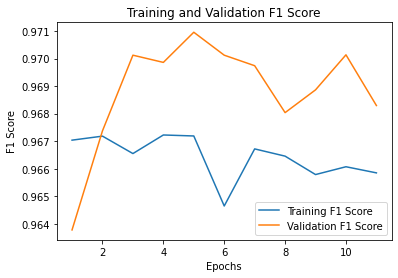

In [186]:
Classification_random_search_Dropout = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_random_search_Dropout.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [187]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +Dropout", 0.9683)

In [188]:
# Save the weights
Classification_random_search_Dropout.save("Classification_random_search_Dropout.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [189]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Hyperband search on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    #Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


hyperband_tuner = kt.Hyperband(
    build_model, objective=objective, max_epochs=100,
    factor=3, directory="classification", project_name="my_hyperband_classification", seed=42)

hyperband_tuner.search(x_train_1, y_train_1, epochs=100,
                       validation_data=(x_val_1, y_val_1),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 254 Complete [00h 00m 08s]
val_f1_m: 0.9652283191680908

Best val_f1_m So Far: 0.9720460772514343
Total elapsed time: 00h 31m 21s


Epoch 1/100
372/372 [==============================] - 2s 3ms/step - loss: 0.1143 - accuracy: 0.9677 - f1_m: 0.9666 - val_loss: 0.1228 - val_accuracy: 0.9680 - val_f1_m: 0.9669
Epoch 2/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9683 - f1_m: 0.9674 - val_loss: 0.1123 - val_accuracy: 0.9684 - val_f1_m: 0.9676
Epoch 3/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9674 - f1_m: 0.9665 - val_loss: 0.1113 - val_accuracy: 0.9684 - val_f1_m: 0.9679
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9684 - f1_m: 0.9679 - val_loss: 0.1128 - val_accuracy: 0.9680 - val_f1_m: 0.9677
Epoch 5/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9677 - f1_m: 0.9670 - val_loss: 0.1174 - val_accuracy: 0.9694 - val_f1_m: 0.9687
Epoch 6/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9682 - f1_m: 0.9664

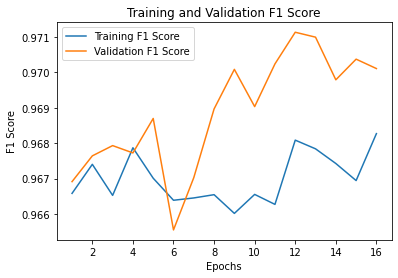

In [190]:
Classification_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_hyper_search.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [191]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+Hyperband ", 0.9701)

In [192]:
# Save the weights
Classification_hyper_search.save("Classification_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [193]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Bayesian optimization on random forest-selected data
def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    # Define the number of hidden layers, neurons and learning rate value
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2) 
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)    
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective=objective, max_trials=5,
    directory="classification", project_name="my_bayesian_classification", seed=42)

bayesian_opt_tuner.search(x_train_1, y_train_1, epochs=100,
                       validation_data=(x_val_1, y_val_1),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 13s]
val_f1_m: 0.9650117754936218

Best val_f1_m So Far: 0.9661712050437927
Total elapsed time: 00h 01m 04s


Epoch 1/100
372/372 [==============================] - 2s 3ms/step - loss: 0.1333 - accuracy: 0.9647 - f1_m: 0.9635 - val_loss: 0.1303 - val_accuracy: 0.9670 - val_f1_m: 0.9668
Epoch 2/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1325 - accuracy: 0.9652 - f1_m: 0.9646 - val_loss: 0.1310 - val_accuracy: 0.9660 - val_f1_m: 0.9658
Epoch 3/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1323 - accuracy: 0.9650 - f1_m: 0.9640 - val_loss: 0.1283 - val_accuracy: 0.9667 - val_f1_m: 0.9661
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1320 - accuracy: 0.9646 - f1_m: 0.9641 - val_loss: 0.1284 - val_accuracy: 0.9650 - val_f1_m: 0.9643
Epoch 5/100
372/372 [==============================] - 1s 3ms/step - loss: 0.1321 - accuracy: 0.9648 - f1_m: 0.9639 - val_loss: 0.1277 - val_accuracy: 0.9660 - val_f1_m: 0.9655
Epoch 6/100
372/372 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9650 - f1_m: 0.9633

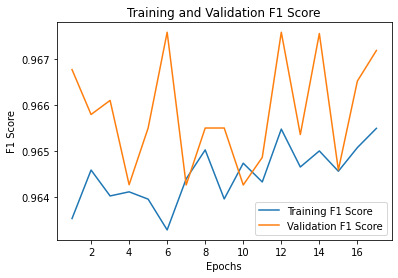

In [194]:
Classification_bayesian_opt = bayesian_opt_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = Classification_bayesian_opt.fit(x_train_1, y_train_1, epochs=100, 
                validation_data=(x_val_1, y_val_1),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [195]:
# Add results to the predefined dataset
add_model_performance_classification(classification_performance_df, "NN+Bayesian ", 0.9672)

In [196]:
# Save the weights
Classification_bayesian_opt.save("Classification_bayesian_opt.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [197]:
# Save results dataset
classification_performance_df.to_csv('classification_performance_df.csv', index=False)

In [198]:
# Read results dataset
classification_performance_df = pd.read_csv('classification_performance_df.csv')

In [199]:
#Sort the dataset by highest F1 score
sorted_df_classification = classification_performance_df.sort_values(by='F1', ascending=False)
sorted_df_classification.head(6)

,Model,F1
2,KNeighbors,0.9755
3,XGBClassifier,0.9739
1,Decision Tree,0.9721
0,Random Forest,0.9720
11,NN+RandomSearch,0.9709
15,NN+Hyperband,0.9701


In [200]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Threshold found from training
threshold = 0.60

y_test_scores = knn_best_estimator.predict_proba(x_test)[:, 1]

# Apply the threshold to the test set
y_test_pred_thresholded = (y_test_scores >= threshold )

#Find the proper metrics
precision = precision_score(y_test, y_test_pred_thresholded)
recall = recall_score(y_test, y_test_pred_thresholded)
f1 = f1_score(y_test, y_test_pred_thresholded)

print(f'Metrics with {threshold:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.60 threshold:
Recall: 0.9720129171151776
Precision: 0.9704459967759269
F1 Score: 0.9712288249529444
